In [1]:
# only adjust settings in this cell
state = 'IA'
root_name = 'Polk'     # which county will root our first district 
k = 4                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 4 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 797592
Single district upper population limit U = 797593


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Polk County to be the root. In our graph, this is vertex # 8


In [6]:
from optimization import districting_heuristic

plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 745 rows, 865 columns and 3665 nonzeros
Model fingerprint: 0x0e84edb4
Variable types: 445 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 109 rows and 109 columns
Presolve time: 0.00s
Presolved: 636 rows, 756 columns, 3002 nonzeros
Variable types: 436 continuous, 320 integer (320 binary)

Root relaxation: objective 5.547523e+00, 176 iterations, 0.00 seconds (0.00 work units)

found [0, 4, 8, 16, 18, 30, 36, 49, 50, 57, 64, 74, 81, 89] with objective = 25.0
   replaced worse solution with objective = 29.0
adding cut saying that objective should be less than 27.0
 1001102 368650 infeasible   58               -   23.17783      -  28.0  245s
 1020563 370791 infeasible   48               -   23.25660      -  28.0  250s
 1040336 372979 infeasible   29               -   23.33373      -  28.0  255s
 1060059 375214 infeasible   44               -   23.41365      -  27.9  260s
found [0, 4, 8, 17, 43, 66, 73, 81, 93] with objective = 26.0
   replaced worse solution with objective = 27.0
adding cut saying that objective should be less than 27.0
 1079502 377065   25.09624   47   32          -   23.49748      -  27.9  265s
found [8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93] with objective = 25.0
   replaced worse solution with objective = 27.0
adding cut saying that objective should be less than 27.0
 1097034 378818   24.26806   52   18          -   23.57695      -

found [0, 4, 10, 16, 18, 34, 45, 50, 61, 75, 81, 88, 98] with objective = 34.0
   ^added to list!
 1321457 541656   30.05527   37   10          -   21.59820      -  19.2  185s
found [0, 5, 7, 11, 13, 15, 23, 29, 30, 32, 35, 36, 40, 50, 51, 52, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90] with objective = 25.0
   ^added to list!
 1359128 555855 infeasible   37               -   21.69069      -  19.2  190s
 1400945 571151 infeasible   50               -   21.79789      -  19.1  195s
 1441266 585951   27.70103   29   95          -   21.90946      -  19.0  200s
 1481871 601753   23.56157   29   40          -   22.00000      -  19.0  205s
 1525135 619279   22.66065   34   77          -   22.00000      -  18.9  210s
 1561192 633976   32.02445   44   26          -   22.03591      -  18.9  215s
 1599477 648396   33.21015   35   36          -   22.09010      -  18.9  220s
found [0, 4, 9, 11, 15, 16, 18, 28, 34, 39, 43, 49, 54, 61, 63, 67, 73, 83, 85, 88, 98] with objective = 42.0

 3509096 1155764 infeasible   31               -   24.96395      -  18.4  525s
found [5, 6, 7, 11, 13, 15, 34, 36, 45, 51, 56, 57, 61, 64, 69, 74, 75, 77, 80, 81, 82, 88, 90] with objective = 25.0
   replaced worse solution with objective = 28.0
adding cut saying that objective should be less than 28.0
 3538475 1161120   25.64169   46   10          -   25.00000      -  18.4  530s
 3567676 1169633   25.18484   37    6          -   25.00000      -  18.4  535s
 3598791 1177044 infeasible   36               -   25.00000      -  18.3  540s
 3624243 1181406   26.50000   31   12          -   25.01683      -  18.4  545s
 3649465 1181757   25.05553   28   11          -   25.05553      -  18.4  550s
 3677757 1181654 infeasible   46               -   25.10309      -  18.4  555s
 3703586 1181372   27.62495   33    8          -   25.14493      -  18.4  560s
 3730935 1180449   27.47032   36   61          -   25.18963      -  18.4  565s
 3756966 1179534   27.16280   32   77          -   25.23093     

     0     2    4.20940    0   33          -    4.20940      -     -    0s

Cutting planes:
  Gomory: 3
  MIR: 6
  StrongCG: 1
  Flow cover: 6
  Zero half: 5
  Mod-K: 1
  RLT: 2

Explored 162 nodes (913 simplex iterations) in 0.13 seconds (0.04 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 662, time in user-callback 0.00 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 526 rows, 503 columns and 2275 nonzeros
Model fingerprint: 0x2f16ce3d
Variable types: 245 continuous, 258 integer (258 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective


Root relaxation: objective 2.959914e+00, 145 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.95991    0   52          -    2.95991      -     -    0s
     0     0    4.25836    0   60          -    4.25836      -     -    0s
     0     0    4.29613    0   67          -    4.29613      -     -    0s
     0     0    4.29629    0   67          -    4.29629      -     -    0s
     0     0    4.42147    0   61          -    4.42147      -     -    0s
     0     0    4.43318    0   61          -    4.43318      -     -    0s
     0     0    4.43680    0   67          -    4.43680      -     -    0s
     0     0    4.43755    0   69          -    4.43755      -     -    0s
     0     0    4.43801    0   71          -    4.43801      -     -    0s
     0     0    4.50820    0   68          -    4.50820      -     -    0s
     0   

 1748472 562692   30.99206   37    7          -   22.46233      -  10.4  135s
 1803785 575206 infeasible   35               -   22.60695      -  10.4  140s
 1857535 586962   27.81862   37   12          -   22.76462      -  10.4  145s
 1910654 598139   33.75000   40    6          -   22.93537      -  10.3  150s
 1962577 609877   32.85165   41   18          -   23.00000      -  10.3  155s
 2016499 626026   28.08389   44    5          -   23.03496      -  10.3  160s
 2077669 640817 infeasible   48               -   23.15292      -  10.3  165s
 2144611 656583   25.25668   37   10          -   23.27373      -  10.3  170s
 2209860 671602   24.22177   34    9          -   23.39505      -  10.3  175s
 2274763 686121 infeasible   43               -   23.51853      -  10.3  180s
 2339331 700673   24.90842   42   30          -   23.65298      -  10.3  185s
 2401477 714895   33.90421   36   30          -   23.78805      -  10.2  190s
 2467291 728828 infeasible   49               -   23.94674      

 6398310 1254552   30.26576   33   34          -   29.13068      -  10.0  570s
 6447083 1256903   32.38174   49    5          -   29.19284      -  10.0  575s
 6493917 1258666   37.94330   46    8          -   29.24795      -  10.0  580s
 6540628 1260703   31.53536   38   40          -   29.30784      -  10.0  585s
 6585688 1262204 infeasible   45               -   29.36504      -  10.0  590s
 6634765 1264385   36.77186   45   11          -   29.42490      -  10.0  595s
 6680325 1265401   33.23143   43    6          -   29.48591      -  10.0  600s
 6728189 1267011   34.45600   44    4          -   29.54906      -  10.0  605s
 6775782 1268642   36.13960   36   31          -   29.61408      -  10.0  610s
 6820979 1269715   39.05560   44   10          -   29.67562      -  10.0  615s
 6864244 1270697   32.04181   42   29          -   29.73918      -  10.0  620s
 6906216 1270621 infeasible   44               -   29.80728      -  10.0  625s
 6946713 1270612 infeasible   34               -   2

 647749 138097   39.03487   41    5          -   32.11356      -   9.1   55s
 711430 146630   40.12771   35   50          -   32.65135      -   9.0   60s
 778054 156314 infeasible   44               -   33.00000      -   8.9   65s
 842978 164190   39.50203   45    9          -   33.43035      -   8.8   70s
 907750 167994   34.00000   38    5          -   34.00000      -   8.8   75s
 973566 175313   38.20295   42   14          -   34.25054      -   8.7   80s
 1038339 177863   42.00000   43    5          -   34.75088      -   8.7   85s
 1103346 181599   38.41625   41   15          -   35.01945      -   8.6   90s
 1166752 181012   41.81463   45    5          -   35.52460      -   8.5   95s
 1229867 180319 infeasible   43               -   36.00000      -   8.5  100s
 1295884 183776 infeasible   44               -   36.24977      -   8.4  105s
 1357797 180305   44.00000   47    5          -   36.74747      -   8.4  110s
 1422830 178458 infeasible   43               -   37.03077      -   8.

 567522 281655   29.11753   38   31          -   18.07639      -  22.3   80s
 605216 298557 infeasible   48               -   18.17506      -  22.3   85s
 644273 316456   26.37416   32   86          -   18.27949      -  22.2   90s
 683770 334770 infeasible   41               -   18.37797      -  22.1   95s
found [0, 9, 29, 37, 43, 50, 53, 58, 59, 62, 63, 68, 73, 75, 79, 85, 88, 93, 98] with objective = 44.0
   ^added to list!
 721481 352484   33.60385   36   80          -   18.47991      -  22.1  100s
 759958 369761   18.75957   34   25          -   18.59514      -  22.1  105s
 799722 388082   21.24554   33   59          -   18.72543      -  22.0  110s
 839512 406246   21.86064   49   78          -   18.88952      -  21.9  115s
 874721 422141 infeasible   52               -   19.00000      -  21.9  120s
 906381 437489   34.03344   46    5          -   19.02704      -  22.0  125s
 940097 452469   34.21534   34   67          -   19.09680      -  21.9  130s
 975633 468081   24.34409   28 

 4022998 1747164 infeasible   50               -   22.71624      -  20.2  570s
 4056453 1760276   32.36301   56    9          -   22.74873      -  20.2  575s
 4091412 1774049   30.17615   38  104          -   22.78257      -  20.1  580s
 4124861 1787374   31.10758   39   29          -   22.81649      -  20.1  585s
 4157280 1800434   34.05004   45   27          -   22.85204      -  20.1  590s
 4191441 1813250   23.03994   38   66          -   22.88959      -  20.1  595s
 4225688 1826787   49.75312   40   21          -   22.92659      -  20.1  600s
 4258115 1839865   35.35053   37   53          -   22.96307      -  20.1  605s
 4289428 1851998   28.00000   43   11          -   23.00000      -  20.1  610s
 4323963 1866622   29.00000   51    3          -   23.00000      -  20.0  615s
 4357180 1880311 infeasible   56               -   23.00000      -  20.0  620s
 4390505 1895662   25.08566   33   71          -   23.00000      -  20.0  625s
 4419622 1910085   30.56940   52   13          -   2

 6861278 2858227   31.86948   56    5          -   24.23235      -  19.5 1070s
 6886158 2867993   30.05559   42   32          -   24.24116      -  19.5 1075s
 6911386 2877351 infeasible   39               -   24.25042      -  19.5 1080s
 6934228 2885830   31.01480   40   25          -   24.25897      -  19.5 1085s
 6956332 2893790   52.99807   65    8          -   24.26690      -  19.5 1090s
 6979185 2902804   47.93878   46   16          -   24.27504      -  19.5 1095s
 7001378 2911118 infeasible   57               -   24.28322      -  19.5 1100s
 7025998 2920188   40.34430   44    4          -   24.29215      -  19.5 1105s
 7049758 2929007   32.26240   46   21          -   24.30124      -  19.5 1110s
 7073141 2937812   47.00000   55    8          -   24.30945      -  19.5 1115s
 7097333 2947193   32.63471   46   27          -   24.31760      -  19.5 1120s
 7118794 2955377 infeasible   38               -   24.32641      -  19.5 1125s
 7142019 2963489   37.00649   38   40          -   2

 8799075 3588305   36.99124   54   10          -   25.00000      -  19.1 1540s
 8817568 3596160   27.28314   45   10          -   25.00000      -  19.1 1545s
 8834090 3603800   27.93753   49    4          -   25.00000      -  19.1 1550s
 8850223 3611358   31.23560   40    6          -   25.00000      -  19.1 1555s
 8866533 3618970   29.07140   48   29          -   25.00252      -  19.2 1560s
 8882962 3624502   30.25657   38   34          -   25.01032      -  19.2 1565s
 8901258 3631199   43.61034   46   63          -   25.01635      -  19.2 1570s
 8917607 3637017   25.09892   46   16          -   25.02298      -  19.2 1575s
 8934138 3643010   44.00000   51   10          -   25.02813      -  19.2 1580s
 8950824 3648393   31.33621   36  104          -   25.03467      -  19.1 1585s
 8965084 3653632   31.00000   49    5          -   25.03896      -  19.1 1590s
 8982278 3660180   25.14561   50   16          -   25.04534      -  19.1 1595s
 8998438 3665661   30.51525   49   37          -   2

 10268462 4102529   39.94405   48   30          -   25.42238      -  19.0 2015s
 10283780 4107372   31.20941   46   15          -   25.42747      -  19.0 2020s
 10297552 4111741   26.05195   34   21          -   25.43217      -  19.0 2025s
 10309817 4116031 infeasible   44               -   25.43609      -  19.0 2030s
 10324134 4120533   34.59599   35   62          -   25.44099      -  19.0 2035s
 10339453 4125637 infeasible   37               -   25.44533      -  19.0 2040s
 10354405 4130074   34.52128   43    6          -   25.45011      -  19.0 2045s
 10368519 4134868   27.00573   35   46          -   25.45491      -  19.0 2050s
 10381529 4138805   27.18537   40   14          -   25.45915      -  19.0 2055s
 10397049 4143800   38.85418   50   21          -   25.46395      -  19.0 2060s
 10410562 4147928   30.07829   54   13          -   25.46818      -  19.0 2065s
 10425415 4152809   25.73404   46   15          -   25.47324      -  19.0 2070s
 10439353 4157406 infeasible   57       

 11597837 4526538   31.77026   33   86          -   25.93888      -  18.9 2515s
 11610134 4530243   27.46603   39   42          -   25.94460      -  18.9 2520s
 11623043 4534142   30.22670   60   30          -   25.95048      -  18.9 2525s
 11636016 4538048 infeasible   52               -   25.95706      -  18.9 2530s
 11647560 4541202   29.98896   29   23          -   25.96325      -  18.9 2535s
 11658770 4544844   29.40468   43   61          -   25.96903      -  18.9 2540s
 11671491 4548873   30.39615   35   69          -   25.97472      -  18.9 2545s
 11683833 4552671   31.46840   33   57          -   25.98094      -  18.9 2550s
 11695520 4556120   30.92813   47    9          -   25.98703      -  18.9 2555s
 11707566 4559845   34.00000   52    5          -   25.99287      -  18.9 2560s
 11719289 4563264   34.90586   45   50          -   25.99946      -  18.9 2565s
 11731670 4567701   29.82622   48    8          -   26.00000      -  18.9 2570s
 11746338 4572374   36.61358   45   40  

 12693928 4879130 infeasible   34               -   26.17787      -  18.8 3000s
 12703388 4881502   30.39793   33   91          -   26.18052      -  18.8 3005s
 12712914 4883748   28.28830   38   48          -   26.18319      -  18.8 3010s
 12721476 4886129 infeasible   54               -   26.18560      -  18.8 3015s
 12732398 4888963   33.45382   51    5          -   26.18859      -  18.8 3020s
 12742539 4891539   30.37836   45   28          -   26.19143      -  18.8 3025s
 12751735 4894029   28.51961   52   41          -   26.19366      -  18.8 3030s
 12763179 4896974   33.53598   38   71          -   26.19660      -  18.8 3035s
 12772868 4899522 infeasible   48               -   26.19942      -  18.8 3040s
 12783004 4902186   32.55894   41   24          -   26.20229      -  18.8 3045s
 12791777 4904433   30.11758   36    4          -   26.20490      -  18.8 3050s
 12802688 4907378   28.64308   35   58          -   26.20765      -  18.8 3055s
 12811441 4909633   32.32197   39    3  

 13433343 5016538 infeasible   45               -   26.45425      -  18.7 3450s
 13441014 5017705   30.39367   35   54          -   26.45771      -  18.7 3455s
 13448451 5018696   30.85159   52   23          -   26.46122      -  18.7 3460s
 13455365 5019638   29.12374   54   12          -   26.46465      -  18.7 3465s
 13464544 5020692 infeasible   39               -   26.46886      -  18.7 3470s
 13470588 5021301 infeasible   56               -   26.47189      -  18.7 3475s
 13478342 5022293 infeasible   40               -   26.47532      -  18.7 3480s
 13485516 5023278   29.00000   43    3          -   26.47894      -  18.7 3485s
 13493776 5024677   27.79380   44    7          -   26.48254      -  18.7 3490s
 13501785 5025836   27.10890   31   21          -   26.48617      -  18.7 3495s
 13508755 5026734 infeasible   42               -   26.48943      -  18.7 3500s
 13518214 5027917   28.12389   37   51          -   26.49418      -  18.7 3505s
 13524894 5028744 infeasible   53       

 14089053 5074911 infeasible   49               -   26.84916      -  18.7 3900s
 14095616 5074910 infeasible   38               -   26.85513      -  18.7 3905s
 14102293 5075001   29.01190   35   31          -   26.86121      -  18.7 3910s
 14108462 5075140   27.39409   28   49          -   26.86671      -  18.7 3915s
 14115928 5075153   26.96937   46    7          -   26.87300      -  18.7 3920s
 14122644 5075094 infeasible   56               -   26.87896      -  18.7 3925s
 14128114 5075018 infeasible   58               -   26.88411      -  18.7 3930s
 14136012 5074975   29.56761   53   28          -   26.89119      -  18.7 3935s
 14142647 5075139   29.92968   47   37          -   26.89708      -  18.7 3940s
 14149986 5075039 infeasible   54               -   26.90382      -  18.7 3946s
 14155809 5074767 infeasible   35               -   26.90941      -  18.7 3950s
 14162353 5074814   27.76458   42   15          -   26.91560      -  18.7 3955s
 14169511 5074736 infeasible   53       

 14787674 5124248   29.16358   47   33          -   27.15421      -  18.6 4385s
 14793732 5124049 infeasible   40               -   27.15738      -  18.6 4390s
 14800621 5123534   27.76697   49   12          -   27.16135      -  18.6 4395s
 14807429 5123250   29.06125   33   11          -   27.16502      -  18.6 4400s
 14814330 5122888 infeasible   51               -   27.16876      -  18.6 4405s
 14821624 5122482 infeasible   52               -   27.17249      -  18.6 4410s
 14827551 5121995   28.01080   38    8          -   27.17571      -  18.6 4415s
 14834611 5121477   29.46202   37   68          -   27.17963      -  18.6 4420s
 14842378 5120989   29.15608   52   22          -   27.18403      -  18.6 4426s
 14849647 5120710   28.40456   34   53          -   27.18798      -  18.6 4430s
 14856535 5120332 infeasible   38               -   27.19143      -  18.6 4437s
 14861497 5119926   28.59740   57    6          -   27.19437      -  18.6 4440s
 14869304 5119328 infeasible   48       

 15491996 5070952   28.36918   41    5          -   27.55299      -  18.6 4901s
 15497525 5070417 infeasible   44               -   27.55680      -  18.6 4907s
 15503469 5069839   29.03593   56    5          -   27.56049      -  18.6 4910s
 15509736 5069336   28.00000   39    3          -   27.56418      -  18.6 4915s
 15516694 5068178 infeasible   44               -   27.56923      -  18.6 4920s
 15524327 5067495   28.30980   58    9          -   27.57417      -  18.6 4926s
 15531588 5066717 infeasible   44               -   27.57843      -  18.6 4931s
 15537280 5066070   29.53899   55    8          -   27.58211      -  18.6 4935s
 15543029 5065369 infeasible   36               -   27.58660      -  18.6 4940s
 15548545 5064830 infeasible   48               -   27.59033      -  18.6 4945s
 15556262 5064181   28.82742   49    5          -   27.59518      -  18.6 4950s
 15563027 5063584 infeasible   56               -   27.59963      -  18.6 4955s
 15568506 5063184 infeasible   49       

 16121684 5010316 infeasible   54               -   28.00000      -  18.5 5385s
 16127547 5011044 infeasible   44               -   28.00000      -  18.5 5390s
 16134912 5012122   29.00086   52    8          -   28.00000      -  18.5 5395s
 16141317 5013145 infeasible   45               -   28.00000      -  18.5 5400s
 16149566 5014234   29.34257   55    6          -   28.00000      -  18.5 5406s
 16156935 5015613 infeasible   54               -   28.00000      -  18.5 5410s
 16162762 5016273   28.00000   39    8          -   28.00000      -  18.5 5415s
 16169872 5017366 infeasible   49               -   28.00000      -  18.5 5420s
 16176541 5018147 infeasible   46               -   28.00000      -  18.5 5425s
 16182313 5018942   29.26312   39   58          -   28.00000      -  18.5 5430s
 16189529 5019680   28.17313   47   10          -   28.00000      -  18.5 5435s
 16195784 5020554   28.50126   49   10          -   28.00000      -  18.5 5440s
 16203338 5021830   28.12805   45   25  

     0     0    2.67206    0   79          -    2.67206      -     -    0s
     0     0    2.67958    0   84          -    2.67958      -     -    0s
     0     0    2.68375    0   88          -    2.68375      -     -    0s
     0     0    2.68383    0   85          -    2.68383      -     -    0s
     0     0    2.68383    0   85          -    2.68383      -     -    0s
     0     0    2.68383    0   85          -    2.68383      -     -    0s
     0     2    3.20073    0   85          -    3.20073      -     -    0s
 29010 11623 infeasible   47               -   13.06921      -  12.9    5s
 83905 32751 infeasible   35               -   15.23512      -  11.3   10s
 139758 53779   22.59727   42   23          -   16.32586      -  10.8   15s
 197452 75752 infeasible   48               -   17.05683      -  10.5   20s
 259884 98211 infeasible   44               -   17.73529      -  10.3   25s
 319839 119605   27.48332   41   27          -   18.18936      -  10.2   30s
 381757 140929   25.

 4281374 869816 infeasible   41               -   27.32666      -   9.1  450s
 4317712 872560   33.62019   44    5          -   27.38191      -   9.1  455s
 4354689 875064   30.00000   36    5          -   27.44071      -   9.1  460s
 4392313 877799   28.06817   42    4          -   27.49879      -   9.1  465s
 4429770 880539 infeasible   45               -   27.55517      -   9.1  470s
 4465031 882498 infeasible   39               -   27.61510      -   9.1  475s
 4500032 884555   35.44029   41    4          -   27.67472      -   9.1  480s
 4534419 886825   41.57749   36    5          -   27.73566      -   9.1  485s
found [5, 7, 9, 13, 14, 19, 25, 30, 32, 33, 35, 36, 37, 40, 55, 56, 57, 62, 64, 66, 69, 70, 72, 74, 77, 80, 82, 84, 87, 89, 90, 91] with objective = 36.0
   ^added to list!
 4568857 888565 infeasible   46               -   27.79883      -   9.1  490s
 4604496 890102   32.00000   36    5          -   27.86812      -   9.1  495s
 4638078 891422   40.11629   43    5          -

 6966717 901123   31.33066   38   12          -   31.00000      -   8.9  905s
 6990496 899790   32.02035   39   13          -   31.00000      -   8.9  910s
 7012027 898291   31.58647   41    7          -   31.00000      -   8.8  915s
 7035410 895537   31.29208   38    4          -   31.00000      -   8.8  920s
 7058627 892521   32.06687   43    9          -   31.00000      -   8.8  925s
 7081258 890901   31.00000   35   16          -   31.00000      -   8.8  930s
 7104549 886721 infeasible   42               -   31.03510      -   8.8  935s
 7129392 880449 infeasible   35               -   31.09375      -   8.8  940s
 7151671 874774 infeasible   45               -   31.14618      -   8.8  945s
 7178405 867492   33.13037   40    8          -   31.21065      -   8.8  950s
 7202143 860726 infeasible   41               -   31.26746      -   8.8  955s
 7225009 854222 infeasible   34               -   31.32100      -   8.8  960s
 7249349 847895   33.81463   40    5          -   31.37494      

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 369 rows, 410 columns and 1740 nonzeros
Model fingerprint: 0x4cbb4b04
Variable types: 203 continuous, 207 integer (207 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 76 rows and 65 columns
Presolve time: 0.01s
Presolved: 293 rows, 345 columns, 1304 nonzeros
Variable types: 196 continuous, 149 integer (149 binary)

Root relaxation: objective 1.122962e+00, 200 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.12296    0   50          -    1.12296      -   

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 410 rows, 399 columns and 1793 nonzeros
Model fingerprint: 0xc756038b
Variable types: 197 continuous, 202 integer (202 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 267 rows and 182 columns
Presolve time: 0.01s
Presolved: 143 rows, 217 columns, 651 nonzeros
Variable types: 95 continuous, 122 integer (122 binary)

Root relaxation: objective 2.487655e+00, 113 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.48766    0   15          -    2.48766      -   

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 166 rows and 87 columns
Presolve time: 0.01s
Presolved: 259 rows, 353 columns, 1172 nonzeros
Variable types: 207 continuous, 146 integer (146 binary)

Root relaxation: objective 1.531778e+00, 95 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.53178    0   41          -    1.53178      -     -    0s
     0     0    2.19290    0   13          -    2.19290      -     -    0s
     0     0    3.00000    0   45          -    3.00000      -     -    0s
     0     0    3.00000    0   48          -    3.00000      -     -    0s
     0     0    3.00000    0   48          -    3.00000      -     -    0s
     0     0    3.00000    0   44          -    3.00000      -     -    0s
     0     0    3.00000    0   47          -    3.00000      -     -    0s


 247746 120757 infeasible   54               -   18.10904      -  19.3   40s
 284859 137534   37.48468   43   32          -   18.32215      -  19.2   45s
 320374 154179   26.36921   36   13          -   18.56464      -  19.1   50s
 358155 171430 infeasible   41               -   18.88595      -  18.9   55s
 395462 189128   22.32017   41   21          -   19.03916      -  18.7   60s
 431905 206168   23.57103   41   62          -   19.18447      -  18.7   65s
 468262 222164   50.14129   42   64          -   19.31176      -  18.6   70s
 504024 238315 infeasible   52               -   19.43840      -  18.6   75s
 542102 254942   27.31498   56    3          -   19.58853      -  18.5   80s
 579568 271957 infeasible   48               -   19.76678      -  18.4   85s
 619902 289904   32.26922   47    7          -   19.97188      -  18.2   90s
 657772 307973 infeasible   49               -   20.01285      -  18.1   95s
 694224 324472   23.00000   51    5          -   20.11497      -  18.1  100s

 3449420 1491044   32.65754   48    6          -   23.31913      -  16.8  520s
found [6, 34, 54, 56, 72, 75, 77, 80, 82, 87, 88, 90, 98] with objective = 37.0
   ^added to list!
 3478510 1502705   31.40333   55    6          -   23.33482      -  16.8  525s
found [3, 6, 10, 11, 12, 16, 18, 29, 34, 38, 45, 46, 48, 51, 60, 67, 75, 76, 80, 83, 85, 86, 88, 94, 95, 96] with objective = 27.0
   ^added to list!
 3506923 1514766   32.20087   42    7          -   23.34927      -  16.8  530s
 3534160 1526129   27.72092   40   27          -   23.36316      -  16.8  535s
 3563072 1537614   29.98483   37   32          -   23.37875      -  16.8  540s
 3590867 1548576   29.98107   48   28          -   23.39409      -  16.8  545s
found [3, 4, 6, 10, 11, 16, 18, 29, 34, 38, 45, 48, 50, 67, 75, 85, 88, 94, 95] with objective = 31.0
   ^added to list!
 3620621 1560493 infeasible   55               -   23.41001      -  16.8  550s
 3647211 1571003   24.26933   35   10          -   23.42484      -  16.8  555

 5524745 2261500   28.34082   52    6          -   24.44785      -  16.7  975s
found [3, 7, 11, 13, 15, 28, 34, 45, 51, 56, 67, 69, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95] with objective = 27.0
   replaced worse solution with objective = 32.0
adding cut saying that objective should be less than 31.0
 5543208 2265807   26.61823   41   26          -   24.46085      -  16.7  980s
 5560011 2269537 infeasible   50               -   24.47449      -  16.7  985s
 5576960 2273365 infeasible   42               -   24.48730      -  16.7  990s
 5593130 2277045   29.26948   45    4          -   24.49916      -  16.7  995s
 5610603 2281266 infeasible   43               -   24.51259      -  16.7 1000s
 5629230 2285126   25.31338   35   11          -   24.52800      -  16.7 1005s
 5645563 2288709   27.15566   42    4          -   24.54075      -  16.7 1010s
 5661181 2292078   30.82131   41   10          -   24.55398      -  16.7 1015s
 5677571 2295567   25.10207   52    9          -   24.56828      - 

 6938770 2539271 infeasible   35               -   25.41680      -  16.6 1430s
 6950910 2539704 infeasible   52               -   25.42711      -  16.6 1435s
 6964271 2540262 infeasible   34               -   25.43869      -  16.6 1440s
 6977267 2541209   26.50627   35   48          -   25.44956      -  16.6 1445s
 6991440 2541829 infeasible   57               -   25.46175      -  16.6 1450s
 7007213 2542759   27.42724   47   28          -   25.47526      -  16.6 1455s
 7019965 2543369   26.46546   43   40          -   25.48640      -  16.6 1460s
 7034135 2544431   26.20728   48    5          -   25.49824      -  16.6 1465s
 7047790 2545091   27.06087   42    6          -   25.50929      -  16.6 1470s
 7063038 2545791   28.43710   43    6          -   25.52295      -  16.6 1475s
 7075266 2546104   28.28051   38    6          -   25.53426      -  16.6 1480s
 7087944 2546716   25.57115   39   33          -   25.54589      -  16.6 1485s
 7100879 2547444   28.15249   48   10          -   2

 8269170 2623820 infeasible   49               -   26.31169      -  16.6 1935s
 8281826 2623366   27.83079   50    5          -   26.31962      -  16.6 1940s
 8293871 2623003 infeasible   40               -   26.32740      -  16.6 1946s
 8306322 2622356 infeasible   39               -   26.33490      -  16.6 1950s
 8317198 2622124   28.11432   40   19          -   26.34146      -  16.6 1955s
 8329416 2621451   28.64566   54    9          -   26.34885      -  16.6 1960s
 8344306 2620809   27.15127   46    7          -   26.35876      -  16.6 1965s
 8356050 2620505 infeasible   43               -   26.36589      -  16.6 1970s
 8370519 2619759 infeasible   53               -   26.37496      -  16.6 1975s
 8381967 2619336 infeasible   51               -   26.38249      -  16.6 1980s
 8395586 2618985   28.37401   55    4          -   26.39126      -  16.6 1985s
 8408131 2618540   27.19514   49    9          -   26.39918      -  16.6 1990s
 8419646 2618076   27.32555   50    6          -   2

Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 47, time in user-callback 0.01 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 496 rows, 458 columns and 2102 nonzeros
Model fingerprint: 0xeb113842
Variable types: 223 continuous, 235 integer (235 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 171 rows and 66 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 avail

 118881 49835 infeasible   31               -   14.30948      -  10.8   10s
 166204 66809   20.43941   26   35          -   15.00000      -  10.6   15s
 215944 82270   21.25927   43    4          -   15.77762      -  10.4   20s
 276064 98591   22.00000   33    3          -   16.53055      -  10.3   25s
 334162 113825 infeasible   30               -   17.18604      -  10.3   30s
 392047 127766   27.19488   38    4          -   17.86968      -  10.2   35s
 454549 142423   32.95893   39    9          -   18.35560      -  10.1   40s
 523869 157634 infeasible   37               -   19.00000      -  10.0   45s
 593403 171764   24.06147   28   33          -   19.62002      -  10.0   50s
 661350 186977   24.37043   26   50          -   20.07235      -   9.9   55s
found [0, 5, 7, 13, 19, 25, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 69, 72, 74, 80, 81, 82, 87, 89, 90] with objective = 25.0
   ^added to list!
 732395 202137 infeasible   33               -   20.56162      -   9.8   60s


Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 549 rows, 468 columns and 2230 nonzeros
Model fingerprint: 0x6ba08860
Variable types: 227 continuous, 241 integer (241 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 344 rows and 103 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 48, time in user-callback 0.01 sec
Set parameter LazyConstraints


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.69909    0   10          -    2.69909      -     -    0s
     0     0    3.21779    0   36          -    3.21779      -     -    0s
     0     0    3.89179    0   28          -    3.89179      -     -    0s
     0     0    3.98664    0   46          -    3.98664      -     -    0s
     0     0    4.00200    0   17          -    4.00200      -     -    0s
     0     0    4.01927    0   51          -    4.01927      -     -    0s
     0     0    4.02496    0   53          -    4.02496      -     -    0s
     0     0    4.04978    0   51          -    4.04978      -     -    0s
     0     0    4.17547    0   45          -    4.17547      -     -    0s
     0     0    4.17611    0   46          -    4.17611      -     -    0s
     0     0    4.17611    0   46          -    4.17611      -     -    0s
     0     2    4.48769

 2285523 1002639 infeasible   35               -   21.85877      -  21.5  335s
 2314478 1014364 infeasible   46               -   21.90933      -  21.5  340s
 2344201 1026792   23.56629   40    4          -   21.96009      -  21.5  345s
 2372510 1038758   34.02547   41   14          -   22.00000      -  21.5  350s
 2404535 1051690   31.28714   39   26          -   22.00000      -  21.4  355s
 2436181 1065286   31.01729   41   55          -   22.00000      -  21.4  360s
 2461990 1078268   28.31839   38   42          -   22.00685      -  21.5  365s
 2491224 1090138 infeasible   50               -   22.03722      -  21.5  370s
 2519661 1101489   24.01694   45   10          -   22.06115      -  21.5  375s
found [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98] with objective = 26.000000000000004
   ^added to list!
 2549344 1113601   28.00000   31   14          -   22.08493      -  21.5  380s
 2578982 1125201 infeasible   37               -   22.11109      -  21

 4797538 1982243   29.67932   42    6          -   23.81920      -  21.4  790s
found [0, 5, 7, 15, 32, 36, 43, 56, 57, 61, 63, 69, 72, 74, 81, 82, 87, 88, 90, 91, 98] with objective = 35.0
   ^added to list!
 4821658 1991789 infeasible   43               -   23.84015      -  21.4  795s
 4845968 2001197   40.62831   49   26          -   23.86143      -  21.4  800s
 4869501 2010205   37.38152   54   12          -   23.88209      -  21.4  805s
 4894433 2019963   26.19722   28   32          -   23.90371      -  21.4  810s
 4918756 2029295   25.10585   38   37          -   23.92663      -  21.4  815s
 4940950 2038317   39.60481   51   12          -   23.94548      -  21.4  820s
 4962203 2047069   25.30735   33   43          -   23.96410      -  21.4  825s
found [5, 7, 9, 11, 13, 30, 32, 34, 35, 36, 40, 51, 56, 57, 58, 64, 69, 70, 72, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90, 91] with objective = 31.0
   ^added to list!
adding cut saying that objective should be less than 35.0
 4982893 2053599

 6215813 2309327 infeasible   41               -   25.04734      -  21.2 1145s
 6232498 2308373   25.59924   50   20          -   25.07086      -  21.2 1150s
 6251477 2307030   27.05517   33   89          -   25.09833      -  21.2 1155s
 6269403 2305703   27.20233   34   79          -   25.12321      -  21.2 1160s
 6287932 2304076 infeasible   45               -   25.14809      -  21.2 1165s
 6304873 2302506   26.14162   58   15          -   25.17171      -  21.2 1170s
 6323173 2300684   26.04741   38   36          -   25.19787      -  21.2 1175s
 6337564 2299310   27.64856   47    6          -   25.21810      -  21.2 1180s
 6356019 2297368 infeasible   47               -   25.24389      -  21.2 1185s
 6372151 2295615   27.79640   52    6          -   25.26627      -  21.2 1190s
 6389483 2293777   25.71404   46   14          -   25.29168      -  21.2 1195s
 6406333 2291627 infeasible   47               -   25.31725      -  21.2 1200s
 6423611 2289421 infeasible   47               -   2

  Lazy constraints: 19

Explored 41388 nodes (306328 simplex iterations) in 2.89 seconds (1.16 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 84193, time in user-callback 0.29 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 514 rows, 506 columns and 2256 nonzeros
Model fingerprint: 0xb7530f19
Variable types: 247 continuous, 259 integer (259 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 201 rows and 95 columns
Presolve time: 0

 3183608 606689   31.24158   35   21          -   26.78428      -   8.6  275s
found [0, 4, 6, 9, 12, 13, 16, 17, 23, 24, 26, 29, 37, 38, 39, 43, 44, 45, 46, 48, 49, 53, 67, 73, 75, 78, 80, 81, 83, 86, 91, 94, 95, 96, 97] with objective = 32.0
   ^added to list!
 3230473 606650 infeasible   34               -   26.92845      -   8.6  280s
 3275363 606293 infeasible   44               -   27.00000      -   8.6  285s
 3321790 609447   29.36755   39   17          -   27.00000      -   8.6  290s
 3370952 614252 infeasible   42               -   27.06666      -   8.6  295s
 3414697 614576   31.38894   36   18          -   27.17125      -   8.6  300s
 3459460 614362 infeasible   41               -   27.28134      -   8.6  305s
 3503985 614037   28.69484   38    8          -   27.38960      -   8.6  310s
 3549201 613487 infeasible   36               -   27.49943      -   8.6  315s
 3591340 612953   32.00419   41    5          -   27.59977      -   8.6  320s
 3628572 612525   30.16318   43    5

     0     0    5.96997    0   34          -    5.96997      -     -    0s
     0     0    5.97183    0   77          -    5.97183      -     -    0s
     0     0    6.02125    0   39          -    6.02125      -     -    0s
     0     0    6.04228    0   35          -    6.04228      -     -    0s
     0     0    6.05005    0   35          -    6.05005      -     -    0s
     0     0    6.05173    0   35          -    6.05173      -     -    0s
     0     0    6.05173    0   35          -    6.05173      -     -    0s
     0     0    6.05173    0   35          -    6.05173      -     -    0s
     0     0    6.05173    0   35          -    6.05173      -     -    0s
     0     2    6.42474    0   35          -    6.42474      -     -    0s

Cutting planes:
  Gomory: 2
  MIR: 2
  Flow cover: 4
  Zero half: 2
  RLT: 22

Explored 32 nodes (889 simplex iterations) in 0.20 seconds (0.07 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best ob

     0     0    3.27203    0   54          -    3.27203      -     -    0s
     0     0    3.27262    0   56          -    3.27262      -     -    0s
     0     0    3.29358    0   53          -    3.29358      -     -    0s
     0     0    3.30877    0   54          -    3.30877      -     -    0s
     0     0    3.31328    0   53          -    3.31328      -     -    0s
     0     0    3.31417    0   54          -    3.31417      -     -    0s
     0     0    3.32328    0   54          -    3.32328      -     -    0s
     0     0    3.33033    0   57          -    3.33033      -     -    0s
     0     0    3.34204    0   57          -    3.34204      -     -    0s
     0     0    3.35133    0   56          -    3.35133      -     -    0s
     0     0    3.35274    0   56          -    3.35274      -     -    0s
     0     0    3.35556    0   55          -    3.35556      -     -    0s
     0     0    3.35572    0   57          -    3.35572      -     -    0s
     0     0    3.35572  


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.18322    0   43          -    2.18322      -     -    0s
     0     0    2.92588    0   67          -    2.92588      -     -    0s
     0     0    2.96215    0   66          -    2.96215      -     -    0s
     0     0    3.41195    0   49          -    3.41195      -     -    0s
     0     0    3.43074    0   64          -    3.43074      -     -    0s
     0     0    3.44160    0   47          -    3.44160      -     -    0s
     0     0    3.44387    0   70          -    3.44387      -     -    0s
     0     0    3.44759    0   48          -    3.44759      -     -    0s
     0     0    3.46188    0   76          -    3.46188      -     -    0s
     0     0    3.51203    0   73          -    3.51203      -     -    0s
     0     0    3.52285    0   76          -    3.52285      -     -    0s
     0     0    3.53476

 4176931 1016334   28.03463   40   17          -   26.14581      -   9.8  425s
 4215090 1021421   32.43600   30   10          -   26.19649      -   9.8  430s
 4254917 1025383   30.97593   33   22          -   26.25403      -   9.8  435s
 4298737 1029945   35.15266   36   17          -   26.31816      -   9.8  440s
 4341903 1034412 infeasible   41               -   26.37912      -   9.8  445s
 4382535 1037765   32.00000   42    3          -   26.44206      -   9.8  450s
 4421004 1040522   32.00000   40    5          -   26.50221      -   9.8  455s
 4459961 1042974 infeasible   49               -   26.56755      -   9.8  460s
 4500052 1045698   30.04029   36   15          -   26.63594      -   9.8  465s
 4537582 1047793   34.00000   37    3          -   26.70310      -   9.8  470s
 4583557 1050358 infeasible   45               -   26.78664      -   9.8  475s
 4627213 1052665   31.13246   42    7          -   26.87026      -   9.8  480s
 4669982 1054552 infeasible   45               -   2

 7324847 1039329   35.67496   37    4          -   30.62360      -   9.4  890s
found [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 33, 36, 38, 50, 51, 56, 57, 58, 62, 66, 69, 72, 73, 74, 75, 81, 82, 85, 87, 90, 91, 97] with objective = 33.0
   ^added to list!
 7345214 1037011   39.77987   41    5          -   30.66156      -   9.4  895s
 7367348 1035366 infeasible   42               -   30.69889      -   9.4  900s
 7388380 1033459   31.24198   40    9          -   30.73571      -   9.4  905s
 7406066 1031853   36.38592   48    6          -   30.76871      -   9.4  910s
 7425522 1030375 infeasible   42               -   30.80389      -   9.4  915s
 7447430 1029141   36.22056   43    5          -   30.84129      -   9.4  920s
 7467958 1027596 infeasible   43               -   30.87990      -   9.4  925s
 7487844 1026186   34.06077   42   13          -   30.91710      -   9.4  930s
found [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 36, 38, 43, 51, 56, 57, 62, 63, 66, 69, 70, 72, 73, 74, 75, 81, 


Cutting planes:
  Gomory: 3
  Zero half: 4
  Mod-K: 4
  Lazy constraints: 550

Explored 9196973 nodes (83400036 simplex iterations) in 1339.43 seconds (529.74 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 18715683, time in user-callback 62.72 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 562 rows, 634 columns and 2690 nonzeros
Model fingerprint: 0x6b3d5ffa
Variable types: 319 continuous, 315 integer (315 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e

 1530444 630900   31.00000   51    3          -   22.68132      -  17.1  335s
 1549873 639450 infeasible   44               -   22.71784      -  17.0  340s
 1570113 647710   36.90856   45   25          -   22.75755      -  17.0  345s
 1592170 656437 infeasible   51               -   22.80318      -  17.0  350s
 1613340 665298   31.56958   33   42          -   22.84239      -  17.0  355s
found [0, 5, 6, 7, 10, 13, 16, 29, 30, 34, 35, 36, 40, 49, 50, 51, 56, 57, 61, 64, 69, 74, 75, 77, 80, 81, 88, 89, 90] with objective = 31.0
   ^added to list!
adding cut saying that objective should be less than 36.0
 1633790 672752   32.83688   51    5          -   22.88841      -  17.0  360s
 1652578 679467   30.55187   51    5          -   22.93932      -  16.9  365s
 1672139 686767   30.11856   46   10          -   22.98862      -  16.9  370s
 1694861 695906   31.29441   34   47          -   23.00000      -  16.9  375s
 1718447 705089 infeasible   36               -   23.00000      -  16.9  380s
 1

 2854370 949817 infeasible   34               -   25.00000      -  16.6  730s
 2879374 953029 infeasible   50               -   25.02879      -  16.6  735s
 2904504 954003 infeasible   37               -   25.07459      -  16.6  740s
 2929589 954411   25.61286   29   70          -   25.11966      -  16.6  745s
 2955408 954829   26.20868   44   33          -   25.16211      -  16.6  750s
 2981411 955032 infeasible   39               -   25.20508      -  16.6  755s
 3003906 954725   27.26608   42   11          -   25.24155      -  16.6  760s
 3021735 954375   26.89748   39   20          -   25.27113      -  16.6  765s
found [0, 5, 7, 11, 13, 15, 29, 30, 32, 35, 36, 43, 49, 50, 51, 52, 56, 57, 63, 64, 66, 69, 70, 74, 77, 80, 81, 82, 88, 89, 90, 91] with objective = 26.0
   replaced worse solution with objective = 28.0
adding cut saying that objective should be less than 28.0
 3040579 953853   26.00841   35   44          -   25.30086      -  16.6  770s
 3058786 953804 infeasible   32      

Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 109159, time in user-callback 0.35 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 341 rows, 347 columns and 1519 nonzeros
Model fingerprint: 0x6861288d
Variable types: 169 continuous, 178 integer (178 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 121 rows and 65 columns
Presolve time: 0.01s
Presolved: 220 rows, 282 columns, 980 nonzeros
Variable types: 164 continuous, 118 integer (118 binar


Optimize a model with 455 rows, 364 columns and 1780 nonzeros
Model fingerprint: 0x8d52105c
Variable types: 175 continuous, 189 integer (189 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 188 rows and 62 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 47, time in user-callback 0.00 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 421 row

     0     0    3.74670    0   58          -    3.74670      -     -    0s
     0     0    3.74733    0   58          -    3.74733      -     -    0s
     0     0    3.74927    0   58          -    3.74927      -     -    0s
     0     0    3.75064    0   57          -    3.75064      -     -    0s
     0     0    3.78694    0   60          -    3.78694      -     -    0s
     0     0    3.80309    0   59          -    3.80309      -     -    0s
     0     0    3.80487    0   61          -    3.80487      -     -    0s
     0     0    3.80534    0   60          -    3.80534      -     -    0s
     0     0    3.80564    0   60          -    3.80564      -     -    0s
     0     0    3.80564    0   60          -    3.80564      -     -    0s
     0     0    3.80564    0   60          -    3.80564      -     -    0s
     0     0    3.80564    0   60          -    3.80564      -     -    0s
     0     2    4.22229    0   60          -    4.22229      -     -    0s

Cutting planes:
  Gomory

 1294542 617617   29.66266   44   15          -   20.10989      -  21.2  240s
found [0, 4, 6, 10, 16, 18, 29, 30, 32, 34, 45, 49, 50, 57, 64, 70, 74, 75, 81, 83, 85, 88, 89] with objective = 23.0
   ^added to list!
 1321951 629591   32.49071   54   10          -   20.13753      -  21.2  245s
 1351548 642672 infeasible   40               -   20.16705      -  21.1  250s
found [5, 7, 11, 13, 15, 23, 29, 30, 32, 34, 35, 40, 50, 51, 56, 57, 58, 63, 64, 69, 70, 72, 74, 77, 80, 82, 85, 87, 88, 89, 90, 91] with objective = 30.0
   ^added to list!
 1380092 654827   31.35968   31   58          -   20.19363      -  21.1  255s
 1409128 667646   21.04100   50    6          -   20.22167      -  21.1  260s
 1436384 679611   21.39649   38   12          -   20.25148      -  21.1  265s
 1464953 692396   24.12215   34  105          -   20.27753      -  21.1  270s
 1494341 705490   23.62520   38   85          -   20.30506      -  21.1  275s
 1523117 717517 infeasible   39               -   20.33500      -

 2720976 1115001   24.40984   46    6          -   21.94302      -  20.6  540s
 2737334 1118173   22.03743   46   16          -   21.98197      -  20.6  545s
found [0, 5, 7, 11, 15, 30, 34, 36, 49, 50, 56, 57, 64, 69, 74, 77, 80, 81, 82, 87, 88, 90, 98] with objective = 25.0
   replaced worse solution with objective = 26.0
adding cut saying that objective should be less than 26.0
 2756301 1123821 infeasible   40               -   22.00000      -  20.6  550s
found [5, 6, 7, 10, 11, 13, 28, 29, 30, 32, 34, 35, 36, 45, 51, 52, 57, 64, 69, 70, 74, 75, 77, 80, 81, 85, 88, 89] with objective = 25.0
   replaced worse solution with objective = 26.0
adding cut saying that objective should be less than 25.0
 2779468 1130030   23.00320   45   14          -   22.00000      -  20.6  555s
 2801716 1136305   22.71953   44    4          -   22.00000      -  20.6  560s
found [0, 4, 5, 7, 11, 15, 16, 34, 49, 50, 51, 56, 57, 61, 64, 69, 72, 74, 77, 80, 81, 82, 87, 88, 90] with objective = 23.0
   replace

Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 1409461, time in user-callback 4.37 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 398 rows, 425 columns and 1817 nonzeros
Model fingerprint: 0xc8b7ce75
Variable types: 205 continuous, 220 integer (220 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 126 rows and 81 columns
Presolve time: 0.01s
Presolved: 272 rows, 344 columns, 1195 nonzeros
Variable types: 196 continuous, 148 integer (148 bin

     0     0    2.24592    0   62          -    2.24592      -     -    0s
     0     0    2.71734    0   68          -    2.71734      -     -    0s
     0     0    2.72607    0   68          -    2.72607      -     -    0s
     0     0    2.72664    0   71          -    2.72664      -     -    0s
     0     0    2.74052    0   69          -    2.74052      -     -    0s
     0     0    2.76230    0   71          -    2.76230      -     -    0s
     0     0    2.76991    0   71          -    2.76991      -     -    0s
     0     0    2.77561    0   68          -    2.77561      -     -    0s
     0     0    2.77813    0   75          -    2.77813      -     -    0s
     0     0    2.78802    0   75          -    2.78802      -     -    0s
     0     0    2.80301    0   76          -    2.80301      -     -    0s
     0     0    2.84329    0   72          -    2.84329      -     -    0s
     0     0    2.85314    0   75          -    2.85314      -     -    0s
     0     0    2.86818  

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 78 rows and 65 columns
Presolve time: 0.00s
Presolved: 303 rows, 355 columns, 1344 nonzeros
Variable types: 202 continuous, 153 integer (153 binary)

Root relaxation: objective 1.122962e+00, 208 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.12296    0   52          -    1.12296      -     -    0s
     0     0    1.68444    0   53          -    1.68444      -     -    0s
     0     0    1.69873    0   55          -    1.69873      -     -    0s
     0     0    2.12158    0   59          -    2.12158      -     -    0s
     0     0    2.12771    0   59          -    2.12771      -     -    0s
     0     0    2.20330    0   59          -    2.20330      -     -    0s
     0     0    2.25262    0   61        

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 396 rows, 429 columns and 1829 nonzeros
Model fingerprint: 0x1e17e285
Variable types: 209 continuous, 220 integer (220 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 94 rows and 74 columns
Presolve time: 0.01s
Presolved: 302 rows, 355 columns, 1326 nonzeros
Variable types: 201 continuous, 154 integer (154 binary)

Root relaxation: objective 1.684443e+00, 197 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.68444    0   53          -    1.68444      -     -    0s
     0     0    2.24245    0   55          -    2.24245      -     -    0s
     0     0    2.24592    0   55          -    2.24592  


Explored 1506725 nodes (14518630 simplex iterations) in 128.57 seconds (65.47 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 3049552, time in user-callback 9.53 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 447 rows, 481 columns and 2055 nonzeros
Model fingerprint: 0x26b53a3f
Variable types: 233 continuous, 248 integer (248 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 106 rows and 82 columns
Presolve time: 0.00s
Presolved

 1385862 589987   29.09633   51    4          -   22.00000      -  18.5  190s
 1424419 606150   24.37946   30    7          -   22.00000      -  18.4  195s
found [4, 9, 10, 11, 13, 16, 18, 34, 36, 45, 49, 66, 73, 75, 77, 80, 85, 88] with objective = 44.0
   ^added to list!
 1458789 621902   27.13221   54   29          -   22.04788      -  18.4  200s
found [0, 3, 4, 6, 9, 10, 11, 18, 28, 29, 34, 45, 49, 66, 73, 75, 83, 85, 88, 95] with objective = 37.0
   ^added to list!
adding cut saying that objective should be less than 44.0
 1491289 634981   24.87485   55   16          -   22.09681      -  18.4  205s
 1524804 648782   25.58401   31   96          -   22.14362      -  18.4  210s
 1559117 662562   25.46033   36   38          -   22.18675      -  18.3  215s
 1593106 676430   34.18110   55   11          -   22.22863      -  18.3  220s
found [0, 5, 7, 11, 13, 15, 23, 29, 30, 32, 35, 36, 40, 50, 51, 52, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90] with objective = 25.0
   re


Cutting planes:
  Gomory: 3
  Lazy constraints: 198

Explored 3545768 nodes (61042143 simplex iterations) in 555.19 seconds (356.33 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 7221708, time in user-callback 23.41 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 442 rows, 394 columns and 1844 nonzeros
Model fingerprint: 0x73b23a31
Variable types: 195 continuous, 199 integer (199 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed

 158288 80134   28.34659   47    9          -   15.15732      -  11.8   15s
 217226 106394 infeasible   45               -   15.72528      -  11.7   20s
found [4, 5, 6, 7, 13, 18, 29, 30, 35, 36, 38, 40, 45, 56, 57, 64, 67, 69, 70, 72, 74, 75, 80, 82, 83, 87, 89, 90, 95] with objective = 19.0
   ^added to list!
 276347 134254   25.96047   34   38          -   16.18296      -  11.7   25s
 336004 160925   34.47763   50   10          -   16.55257      -  11.7   30s
found [5, 6, 7, 10, 13, 16, 23, 29, 30, 32, 35, 36, 38, 43, 45, 49, 56, 57, 58, 64, 67, 69, 70, 72, 74, 75, 80, 81, 82, 83, 87, 89, 90, 91, 95] with objective = 29.0
   ^added to list!
 395990 188678   19.53591   33    6          -   17.00000      -  11.6   35s
 455451 215419   40.33907   48    5          -   17.19752      -  11.7   40s
 513373 241383   29.61911   47    6          -   17.44734      -  11.6   45s
 570611 266612   31.26819   42    4          -   17.72457      -  11.6   50s
 627573 291728   25.11988   43   11     

 3627178 1398775 infeasible   33               -   22.24833      -  11.3  415s
 3658054 1405073   28.08370   35    7          -   22.28203      -  11.3  420s
 3686809 1411275   26.30685   39    4          -   22.31438      -  11.3  425s
 3717284 1417708 infeasible   33               -   22.35049      -  11.3  430s
 3746775 1423834   28.88395   26   25          -   22.38640      -  11.3  435s
 3779484 1430071   25.52613   31   39          -   22.42557      -  11.3  440s
 3811124 1436290   28.32058   38   16          -   22.46364      -  11.3  445s
 3839573 1441904   26.05820   44   10          -   22.49844      -  11.3  450s
 3868681 1447913 infeasible   46               -   22.53366      -  11.4  455s
found [1, 2, 4, 6, 10, 13, 14, 16, 17, 18, 23, 29, 33, 37, 38, 41, 45, 49, 50, 52, 53, 58, 59, 62, 67, 68, 75, 79, 83, 84, 93, 95] with objective = 27.0
   replaced worse solution with objective = 29.0
adding cut saying that objective should be less than 28.000000000000004
 3899673 145284

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 286 rows and 189 columns
Presolve time: 0.01s
Presolved: 97 rows, 176 columns, 428 nonzeros
Variable types: 72 continuous, 104 integer (104 binary)

Root relaxation: objective 3.966307e+00, 67 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.96631    0   23          -    3.96631      -     -    0s
     0     0    5.03174    0   32          -    5.03174      -     -    0s
     0     0    5.24994    0   40          -    5.24994      -     -    0s
     0     0    5.24999    0   40          -    5.24999      -     -    0s
     0     0    5.51462    0   39          -    5.51462      -     -    0s
     0     0    5.53314    0   39          -    5.53314      -     -    0s
     0     0    5.54151    0   40          -    5.54151      -     -    0s
  

 369892 108787   24.17803   40    9          -   20.19457      -  10.6   30s
 434825 125455   24.74049   34    4          -   20.76050      -  10.4   35s
 501021 142348   24.29899   23   48          -   21.19811      -  10.3   40s
found [0, 5, 7, 9, 15, 23, 25, 30, 32, 33, 36, 43, 50, 51, 53, 56, 57, 62, 64, 66, 69, 72, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90, 91] with objective = 37.0
   ^added to list!
found [5, 7, 9, 15, 16, 25, 30, 32, 33, 35, 36, 40, 43, 50, 51, 52, 56, 57, 62, 63, 64, 66, 69, 70, 72, 74, 77, 80, 82, 87, 89, 90, 91] with objective = 28.0
   ^added to list!
 563846 157395 infeasible   34               -   21.62912      -  10.2   45s
found [5, 7, 9, 14, 15, 25, 30, 32, 33, 35, 36, 40, 43, 50, 51, 52, 53, 55, 56, 57, 58, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91] with objective = 27.0
   ^added to list!
 627498 173163 infeasible   44               -   22.00000      -  10.1   50s
 685007 188705   24.00000   29    3          -   22.25778      -  10.1   55s


     0     0    2.12766    0   59          -    2.12766      -     -    0s
     0     0    2.12781    0   59          -    2.12781      -     -    0s
     0     0    2.12781    0   59          -    2.12781      -     -    0s
     0     2    2.90067    0   59          -    2.90067      -     -    0s
 49957 28060   19.21859   42    9          -   13.42935      -  12.9    5s
 122782 63823   15.95925   21   37          -   14.92684      -  11.8   10s
 186074 93164   28.02490   44    7          -   15.61876      -  11.4   15s
 240550 117560   23.01217   29   17          -   16.17404      -  11.4   20s
 300390 141304   23.04043   35   26          -   16.68425      -  11.4   25s
found [0, 2, 3, 4, 17, 18, 28, 29, 37, 38, 41, 49, 50, 51, 53, 54, 62, 63, 66, 67, 68, 73, 75, 77, 79, 81, 83, 91, 93, 95] with objective = 24.0
   ^added to list!
 354164 163064   24.10239   34    9          -   17.10995      -  11.4   30s
found [5, 7, 9, 13, 15, 19, 23, 29, 30, 31, 32, 35, 40, 42, 51, 52, 55, 56, 57

 3250853 906825 infeasible   42               -   24.75505      -  11.2  330s
 3287714 898352   26.08791   36    4          -   24.93287      -  11.2  335s
 3327082 895892 infeasible   40               -   25.00000      -  11.2  340s
 3362445 892426 infeasible   39               -   25.02993      -  11.2  345s
 3400840 882161 infeasible   34               -   25.16579      -  11.2  350s
 3438659 870129 infeasible   40               -   25.30134      -  11.2  355s
 3476535 858017   26.20047   33   19          -   25.44035      -  11.2  360s
 3514255 845244 infeasible   46               -   25.58784      -  11.2  365s
 3553142 831242 infeasible   39               -   25.75424      -  11.2  370s
 3586677 817618 infeasible   43               -   25.92144      -  11.2  375s
 3621843 808326 infeasible   37               -   26.00000      -  11.2  380s

Cutting planes:
  Gomory: 2
  MIR: 1
  Lazy constraints: 355

Explored 3651744 nodes (40743178 simplex iterations) in 385.49 seconds (204.86 

 897504 355163 infeasible   37               -   20.74816      -  22.7  160s
 927664 366345 infeasible   55               -   20.88831      -  22.6  165s
 958437 377576 infeasible   47               -   21.00000      -  22.5  170s
 985233 388195   39.05201   45   16          -   21.03044      -  22.6  175s
 1013959 398812   36.30232   49    8          -   21.10528      -  22.6  180s
 1044738 409843   26.05940   35   72          -   21.18173      -  22.6  185s
 1070522 419078   23.40174   48   11          -   21.25046      -  22.6  190s
 1099548 429176   25.17889   33   68          -   21.32174      -  22.5  195s
 1129213 440530   47.23351   40   78          -   21.39935      -  22.5  200s
 1159432 451507   46.76209   59   16          -   21.47901      -  22.5  205s
 1190589 462356 infeasible   46               -   21.56407      -  22.4  210s
 1221722 474131   34.48660   35   64          -   21.64780      -  22.4  215s
 1250734 484441   30.02424   33   26          -   21.73187      -  2

 3655921 1330886   26.00000   47    5          -   25.12168      -  21.0  670s
 3679708 1338844   29.66733   51    6          -   25.14220      -  21.0  675s
 3704917 1346906   40.49412   39   78          -   25.16426      -  21.0  680s
 3728605 1354784   30.39445   36    5          -   25.18401      -  21.0  685s
 3754696 1362874 infeasible   51               -   25.20600      -  21.0  690s
 3779794 1371109   30.18928   33   67          -   25.22920      -  21.0  695s
 3806069 1379662   25.35522   38    5          -   25.25161      -  21.0  700s
 3830491 1388028   26.27062   51   65          -   25.27336      -  21.0  705s
 3853099 1395457   28.02792   39   59          -   25.29544      -  21.0  710s
 3875050 1402773   27.16498   45    4          -   25.31521      -  21.0  715s
 3898939 1410386 infeasible   40               -   25.33584      -  21.0  720s
 3922494 1418148   30.41971   51   15          -   25.35753      -  20.9  725s
 3947488 1426223   54.00000   49   39          -   2

 5911397 2042070   62.84393   58   28          -   27.04331      -  20.6 1160s
 5932299 2048229 infeasible   45               -   27.05831      -  20.6 1165s
 5953561 2054867   47.14280   60   21          -   27.07272      -  20.6 1170s
 5974797 2061266   28.55027   41   78          -   27.08713      -  20.6 1175s
 5995435 2067347   34.03858   51   21          -   27.10005      -  20.6 1180s
 6015725 2073670 infeasible   50               -   27.11289      -  20.6 1185s
found [2, 6, 10, 13, 14, 29, 41, 45, 59, 68, 75, 76, 78, 80, 83, 84, 85, 88, 93, 94, 95] with objective = 42.0
   ^added to list!
 6034902 2079610 infeasible   44               -   27.12512      -  20.6 1190s
 6053270 2085160   30.20209   40   36          -   27.13674      -  20.6 1195s
 6071390 2090746   27.20440   41   62          -   27.14768      -  20.6 1200s
 6090801 2096809   44.08573   45    4          -   27.15919      -  20.6 1205s
 6109814 2102358   28.54517   46   19          -   27.16990      -  20.6 1210s
 

 7527404 2509605   32.00000   38   16          -   28.11768      -  20.4 1630s
 7539249 2512690   30.55696   49    5          -   28.12559      -  20.4 1635s
 7552935 2515318 infeasible   47               -   28.13493      -  20.4 1640s
 7568283 2518429   39.66675   39  107          -   28.14562      -  20.4 1645s
 7580079 2521437 infeasible   47               -   28.15301      -  20.4 1650s
 7593756 2524491   34.00000   43    6          -   28.16266      -  20.4 1655s
 7608821 2527785 infeasible   47               -   28.17354      -  20.4 1660s
 7622557 2530841   36.32150   54   23          -   28.18241      -  20.4 1665s
 7633847 2533086   36.71239   36   38          -   28.18992      -  20.4 1670s
 7646480 2535906   38.41399   50   29          -   28.19875      -  20.4 1675s
 7658840 2538627 infeasible   45               -   28.20678      -  20.4 1680s
 7672754 2541527 infeasible   40               -   28.21646      -  20.4 1685s
 7683438 2544219   41.62311   47   48          -   2

 8719476 2745592   30.33333   34   44          -   29.00000      -  20.3 2110s
 8728689 2748621   36.62072   51   10          -   29.00009      -  20.3 2115s
 8738941 2750769 infeasible   41               -   29.00822      -  20.3 2120s
 8748475 2752493   32.33945   50    6          -   29.01493      -  20.3 2125s
 8759350 2754116 infeasible   46               -   29.02377      -  20.3 2130s
 8768966 2755782   34.42722   49   12          -   29.03039      -  20.3 2135s
 8779991 2757305   36.11505   50   36          -   29.03819      -  20.3 2140s
 8791117 2759428   38.80882   42   13          -   29.04691      -  20.3 2145s
 8800714 2760897   38.62556   53   21          -   29.05278      -  20.3 2150s
 8812043 2762962   32.29696   41   56          -   29.06103      -  20.3 2155s
 8823540 2764793 infeasible   45               -   29.06963      -  20.2 2160s
 8834208 2766463   36.52865   30   95          -   29.07682      -  20.2 2165s
 8843708 2767964   38.21974   54    6          -   2

found [12, 15, 24, 25, 26, 34, 38, 39, 44, 46, 47, 54, 60, 67, 71, 72, 76, 77, 86, 88, 96, 97] with objective = 37.0
   replaced worse solution with objective = 38.0
adding cut saying that objective should be less than 37.0
 9909493 2920208 infeasible   47               -   29.89300      -  20.1 2615s
 9921395 2921611   34.35471   48   60          -   29.90393      -  20.0 2620s
 9932573 2922780 infeasible   53               -   29.91483      -  20.0 2625s
 9943322 2923772   35.38856   59   16          -   29.92507      -  20.0 2630s
 9953052 2924852   35.92088   50   18          -   29.93529      -  20.0 2635s
 9964513 2926087   34.11911   49   33          -   29.94610      -  20.0 2640s
 9974180 2926828   36.03838   39   57          -   29.95621      -  20.0 2645s
 9986915 2928118   35.28916   43   33          -   29.96937      -  20.0 2650s
 9997256 2929081   34.52263   40    8          -   29.97968      -  20.0 2655s
 10007008 2930192   33.90425   52   41          -   29.98950     

 10770227 2860350   31.49698   41    6          -   30.82863      -  19.9 3045s
 10779489 2858091 infeasible   29               -   30.84587      -  19.9 3051s
 10788625 2855825   31.10324   54    6          -   30.86195      -  19.9 3056s
 10797629 2853297 infeasible   40               -   30.87927      -  19.9 3060s
 10806900 2851197 infeasible   48               -   30.89626      -  19.9 3066s
 10814673 2849260 infeasible   31               -   30.90993      -  19.9 3070s
 10822071 2847251 infeasible   42               -   30.92447      -  19.9 3075s
 10832527 2844383   31.94685   47    5          -   30.94479      -  19.9 3080s
 10840773 2842426 infeasible   43               -   30.96071      -  19.9 3085s
 10851109 2839808 infeasible   48               -   30.98064      -  19.9 3090s
 10860951 2837122 infeasible   48               -   31.00000      -  19.9 3095s
 10869991 2836496   32.62650   45   15          -   31.00000      -  19.9 3100s
 10878303 2836489   32.49386   55    6  

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 508 rows, 433 columns and 2059 nonzeros
Model fingerprint: 0x03e84450
Variable types: 209 continuous, 224 integer (224 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 440 rows and 253 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 61, time in user-callback 0.00 sec
Set parameter LazyConstraints

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 684 rows, 447 columns and 2447 nonzeros
Model fingerprint: 0x77c7f2a4
Variable types: 217 continuous, 230 integer (230 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 615 rows and 268 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 108, time in user-callback 0.01 sec
Set parameter LazyConstraint

Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 47, time in user-callback 0.01 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 485 rows, 466 columns and 2102 nonzeros
Model fingerprint: 0xaba05171
Variable types: 227 continuous, 239 integer (239 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 247 rows and 155 columns
Presolve time: 0.01s
Presolved: 238 rows, 311 columns, 1005 nonzeros
Variable types: 165 continuous, 146 integer (146 binary)

     0     0    3.72546    0   83          -    3.72546      -     -    0s
     0     0    3.76921    0   75          -    3.76921      -     -    0s
     0     0    3.78059    0   79          -    3.78059      -     -    0s
     0     0    3.78183    0   80          -    3.78183      -     -    0s
     0     0    3.79150    0   82          -    3.79150      -     -    0s
     0     0    3.79304    0   84          -    3.79304      -     -    0s
     0     0    3.79332    0   84          -    3.79332      -     -    0s
     0     0    3.79332    0   84          -    3.79332      -     -    0s
     0     2    4.15518    0   84          -    4.15518      -     -    0s

Cutting planes:
  Lazy constraints: 18

Explored 39382 nodes (387205 simplex iterations) in 4.79 seconds (2.75 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 80361, time in user-callback 0.31 sec
Set parameter Lazy

 1898761 869740   35.21129   61   11          -   19.19076      -  25.7  345s
 1925041 880999   38.75197   57    9          -   19.20869      -  25.7  350s
 1950015 891724   28.41038   47  100          -   19.22856      -  25.7  355s
 1977617 903816   22.44140   36   69          -   19.24784      -  25.7  360s
 2006596 916070 infeasible   40               -   19.26951      -  25.7  365s
 2035438 928004   22.05409   39   77          -   19.29156      -  25.7  370s
 2063881 939986   23.36941   32   80          -   19.31153      -  25.6  375s
 2093931 952538   29.61062   50   16          -   19.33256      -  25.6  380s
found [6, 7, 10, 11, 16, 18, 28, 34, 45, 49, 56, 61, 69, 75, 82, 83, 85, 87, 88, 90] with objective = 29.0
   ^added to list!
 2121959 964639   28.29106   51   23          -   19.35376      -  25.6  385s
found [10, 11, 15, 16, 25, 45, 49, 51, 61, 72, 75, 83, 85, 88] with objective = 28.0
   ^added to list!
 2150889 977396   43.76247   54   10          -   19.37418      -  2

 3909060 1702247 infeasible   51               -   20.62197      -  25.0  760s
 3926135 1707760   30.09705   49    6          -   20.64018      -  25.0  765s
 3942512 1712731   22.19765   39   49          -   20.65852      -  25.0  770s
 3958635 1717746 infeasible   39               -   20.67691      -  25.0  775s
 3975095 1722726   22.82453   31   34          -   20.69705      -  25.0  780s
 3991793 1727686 infeasible   51               -   20.71557      -  25.0  785s
 4008401 1732852   25.31316   34   30          -   20.73501      -  25.0  790s
 4024211 1737902   23.29474   50   26          -   20.75479      -  25.0  795s
 4041378 1743059 infeasible   48               -   20.77631      -  25.0  800s
 4058756 1748630   22.21008   35   44          -   20.79814      -  25.0  805s
 4076262 1754251 infeasible   43               -   20.82023      -  25.0  810s
 4093739 1759722 infeasible   66               -   20.84309      -  25.0  815s
 4111329 1765290   21.09517   54   29          -   2

 5254925 2090393   26.26314   53   14          -   21.72466      -  25.1 1185s
 5270711 2093245   26.57670   42   31          -   21.74506      -  25.1 1190s
 5285524 2096276 infeasible   39               -   21.76373      -  25.1 1195s
 5299317 2099030   23.70127   33   69          -   21.78229      -  25.1 1200s
 5313570 2101755   22.61089   43   32          -   21.80043      -  25.1 1205s
 5329481 2105023   26.23842   40   61          -   21.82215      -  25.1 1210s
 5344428 2107643   23.51382   56   21          -   21.84403      -  25.1 1215s
 5359201 2110791   23.02161   43    8          -   21.86391      -  25.1 1220s
 5375836 2114195 infeasible   50               -   21.88645      -  25.1 1225s
 5390298 2117170   23.17928   35   89          -   21.90663      -  25.1 1230s
 5404384 2119839   23.23017   36   62          -   21.92690      -  25.1 1235s
found [3, 6, 10, 12, 13, 16, 18, 29, 34, 36, 38, 45, 49, 50, 51, 67, 75, 77, 80, 83, 85, 88, 95] with objective = 25.0
   replaced 

 6598336 2191640   24.12389   47   15          -   23.13981      -  24.8 1660s
 6612031 2189576 infeasible   50               -   23.15417      -  24.8 1665s
 6625770 2187230 infeasible   32               -   23.16778      -  24.8 1670s
 6641563 2184590   24.17366   46    7          -   23.18360      -  24.8 1675s
 6653659 2182515   23.28073   55   51          -   23.19548      -  24.8 1680s
 6669505 2179860 infeasible   53               -   23.21115      -  24.8 1685s
 6683313 2177308   24.00000   49    8          -   23.22480      -  24.8 1690s
 6696974 2174552 infeasible   49               -   23.23932      -  24.8 1695s
 6712139 2171853   24.08927   48    4          -   23.25484      -  24.8 1700s
 6726820 2169508 infeasible   54               -   23.26877      -  24.8 1705s
 6740716 2166919   24.39751   41   17          -   23.28261      -  24.8 1710s
 6754731 2164346 infeasible   45               -   23.29706      -  24.8 1715s
 6768572 2162002 infeasible   44               -   2

 351265 77927   32.18123   33   21          -   26.00000      -  11.1   35s
 420310 85238   31.03830   30    9          -   27.28718      -  10.7   40s
 490634 90128   30.34649   36    5          -   28.70144      -  10.4   45s
 564869 94406   42.59943   32   20          -   30.00000      -  10.0   50s
 638446 96697 infeasible   28               -   31.10000      -   9.7   55s
 710835 98112 infeasible   39               -   32.20845      -   9.4   60s
 778182 95400   35.17131   39    6          -   33.32404      -   9.2   65s
 848173 90874 infeasible   33               -   34.46449      -   9.0   70s
 916807 86719 infeasible   37               -   35.51289      -   8.8   75s
 984368 77677 infeasible   38               -   36.78137      -   8.7   80s
 1051553 66952   40.00000   36    3          -   38.01260      -   8.5   85s
 1119084 52851   44.00000   39    8          -   39.74179      -   8.4   90s
 1180651 31099 infeasible   30               -   42.00000      -   8.2   95s
 1242425 

 2219393 679596   27.50872   42   15          -   26.00000      -  12.0  210s
 2274311 693963   44.11647   41    5          -   26.07106      -  12.0  215s
 2325600 705645 infeasible   37               -   26.19303      -  11.9  220s
 2378314 717910   40.13847   41   27          -   26.31258      -  11.9  225s
 2430917 729602 infeasible   43               -   26.42743      -  11.9  230s
 2482404 741531 infeasible   48               -   26.54098      -  11.8  235s
 2534147 753505   49.00000   41    3          -   26.65995      -  11.8  240s
found [1, 2, 12, 15, 20, 21, 22, 24, 25, 26, 27, 28, 41, 44, 47, 59, 60, 61, 71, 72, 83, 86, 92, 96, 97, 98] with objective = 27.0
   ^added to list!
 2586742 765366   30.72578   31    7          -   26.78326      -  11.8  245s
 2635095 775766   29.26497   48    9          -   26.90601      -  11.8  250s
 2688955 786694 infeasible   48               -   27.00000      -  11.7  255s
 2740468 799326   30.90203   44    9          -   27.05548      -  11.

 6495384 1278753 infeasible   40               -   33.08419      -  10.8  690s
 6533249 1281153   51.47891   48    6          -   33.13859      -  10.8  695s
 6570971 1283572   37.74755   41   22          -   33.18675      -  10.8  700s
 6606895 1285626   42.77254   43   16          -   33.23423      -  10.8  705s
 6643545 1287352 infeasible   45               -   33.28538      -  10.8  710s
 6681692 1289274   38.58099   40   29          -   33.33629      -  10.8  715s
 6718903 1290523   39.96871   43    6          -   33.38958      -  10.8  720s
 6755618 1291786   36.51772   44    9          -   33.44251      -  10.8  725s
 6792384 1292982   40.00000   49    3          -   33.49931      -  10.8  730s
 6826124 1294217 infeasible   49               -   33.54760      -  10.8  735s
 6862061 1296839   45.05607   38   38          -   33.60146      -  10.7  740s
 6896225 1299488 infeasible   40               -   33.64899      -  10.7  745s
 6932072 1302142   36.59922   35   46          -   3

 9756700 1228725 infeasible   41               -   37.54652      -  10.3 1175s
 9787597 1225194 infeasible   45               -   37.59769      -  10.3 1180s
 9816521 1221706   43.36063   36   55          -   37.64633      -  10.2 1185s
 9849632 1217449   40.96317   36   41          -   37.70631      -  10.2 1190s
 9878941 1213043 infeasible   50               -   37.76041      -  10.2 1195s
 9910092 1209318   38.00000   39    5          -   37.81658      -  10.2 1200s
 9942355 1204747 infeasible   43               -   37.87847      -  10.2 1205s
 9973399 1200155   45.77054   44   25          -   37.94309      -  10.2 1210s
 10002734 1195902   41.03060   43    7          -   38.00000      -  10.2 1215s
 10033652 1192085 infeasible   45               -   38.00000      -  10.2 1220s
 10062855 1189328 infeasible   50               -   38.00000      -  10.2 1225s
 10091884 1186724   41.04315   41   32          -   38.01924      -  10.2 1230s
 10120331 1182562   44.00000   44    5          

 12824807 641335 infeasible   45               -   42.80504      -   9.7 1695s
 12854356 630978   43.84420   43    9          -   42.89433      -   9.7 1700s
 12879057 621624 infeasible   47               -   42.97539      -   9.7 1705s
 12907067 614768   43.18414   47    9          -   43.00000      -   9.7 1710s
 12935081 608090 infeasible   39               -   43.00000      -   9.7 1715s
 12961815 600743   44.03294   47   14          -   43.01703      -   9.7 1720s
 12988026 590928 infeasible   43               -   43.08937      -   9.7 1725s
 13012678 581586   45.53974   51    4          -   43.15902      -   9.6 1730s
 13039196 571459 infeasible   48               -   43.23416      -   9.6 1735s
 13067170 560890 infeasible   37               -   43.31445      -   9.6 1740s
 13093916 550117 infeasible   46               -   43.39440      -   9.6 1745s
 13121781 539005   43.71892   45    6          -   43.47887      -   9.6 1750s
 13150016 527846 infeasible   50               -   4

 2178084 536887   37.64873   39   15          -   28.76580      -  12.0  215s
found [1, 3, 12, 20, 21, 22, 24, 25, 26, 27, 28, 33, 41, 44, 45, 46, 47, 48, 54, 60, 71, 76, 84, 85, 86, 92, 96, 97, 98] with objective = 41.0
   ^added to list!
 2224574 542763   35.40317   42    4          -   28.96297      -  12.0  220s
 2269914 547548   32.06057   34   21          -   29.04871      -  12.0  225s
 2310880 551401   33.63283   44   16          -   29.19819      -  12.0  230s
 2352296 554826 infeasible   36               -   29.34619      -  12.0  235s
 2392295 558362   33.75883   37   39          -   29.49576      -  12.0  240s
found [1, 12, 20, 21, 22, 24, 25, 26, 27, 28, 33, 41, 44, 45, 46, 47, 59, 60, 67, 71, 84, 85, 86, 92, 95, 96, 97, 98] with objective = 43.0
   ^added to list!
 2434405 561810 infeasible   39               -   29.64963      -  12.0  245s
 2475590 565668   35.17061   39    4          -   29.80626      -  11.9  250s
 2515410 569061   47.38616   37   35          -   29.96

     0     0    3.38861    0   91          -    3.38861      -     -    0s
     0     0    3.40608    0   89          -    3.40608      -     -    0s
     0     0    3.41837    0   91          -    3.41837      -     -    0s
     0     0    3.42157    0   90          -    3.42157      -     -    0s
     0     0    3.44110    0   93          -    3.44110      -     -    0s
     0     0    3.45013    0   93          -    3.45013      -     -    0s
     0     0    3.45297    0   92          -    3.45297      -     -    0s
     0     0    3.45373    0  100          -    3.45373      -     -    0s
     0     0    3.47461    0   90          -    3.47461      -     -    0s
     0     0    3.48272    0   94          -    3.48272      -     -    0s
     0     0    3.49233    0   95          -    3.49233      -     -    0s
     0     0    3.49529    0  103          -    3.49529      -     -    0s
     0     0    3.49585    0  104          -    3.49585      -     -    0s
     0     0    3.50024  

 3158198 299699 infeasible   41               -   36.72284      -  10.6  385s
 3195307 294806 infeasible   43               -   36.98294      -  10.5  390s
 3231717 292559 infeasible   42               -   37.01460      -  10.5  395s
 3268527 287627 infeasible   42               -   37.23312      -  10.5  400s
 3305306 281779 infeasible   39               -   37.45736      -  10.5  405s
 3341125 275869   39.53240   41   14          -   37.69224      -  10.5  410s
 3378363 269455   37.99410   34   11          -   37.98449      -  10.5  415s
 3414230 265178   39.47831   37   19          -   38.03775      -  10.4  420s
 3451448 256218   41.00000   36    5          -   38.31574      -  10.4  425s
 3489954 248642 infeasible   37               -   38.59144      -  10.4  430s
 3528626 240657 infeasible   37               -   38.92021      -  10.4  435s
 3564579 236768   41.25631   37   14          -   39.00000      -  10.3  440s
 3604797 228998 infeasible   34               -   39.30088      


Optimize a model with 510 rows, 528 columns and 2308 nonzeros
Model fingerprint: 0x18a8b057
Variable types: 259 continuous, 269 integer (269 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 150 rows and 88 columns
Presolve time: 0.01s
Presolved: 360 rows, 440 columns, 1656 nonzeros
Variable types: 253 continuous, 187 integer (187 binary)

Root relaxation: objective 2.151922e+00, 224 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.15192    0   61          -    2.15192      -     -    0s
     0     0    2.70350    0   65          -    2.70350      -     -    0s
     0     0    3.11134    0   64          -    3.11134      -     -    0s
     0     0    3.11134    0   64          -    3.11134  

     0     2    3.50347    0   93          -    3.50347      -     -    0s
 32350 18369   35.76917   52   11          -   10.38122      -  18.1    5s
 85485 44245 infeasible   39               -   12.05743      -  16.7   10s
 139128 69203 infeasible   41               -   13.17771      -  16.2   15s
 192739 93633   25.40801   36   12          -   14.15107      -  15.9   20s
 250179 118706 infeasible   49               -   14.98015      -  15.6   25s
 305659 141472 infeasible   42               -   15.47514      -  15.4   30s
 361147 163646   26.10614   35   23          -   16.15022      -  15.2   35s
 413465 183661   27.35185   33   44          -   16.71671      -  15.1   40s
 469324 204891 infeasible   50               -   17.23070      -  15.0   45s
 526062 227062   28.77308   37   28          -   17.74627      -  14.8   50s
 581804 249130 infeasible   38               -   18.14290      -  14.8   55s
 639194 271573   35.00000   43    3          -   18.50645      -  14.6   60s
 696877

 4724277 1398715   33.82049   38   17          -   28.61439      -  13.2  495s
 4764224 1406126 infeasible   33               -   28.67269      -  13.2  500s
 4802231 1412701 infeasible   37               -   28.73260      -  13.2  505s
 4842470 1419598   34.06495   40    4          -   28.79554      -  13.2  510s
 4880495 1426840 infeasible   36               -   28.85486      -  13.2  515s
 4918534 1433182 infeasible   36               -   28.91717      -  13.2  520s
 4957354 1439708 infeasible   39               -   28.98285      -  13.2  525s
 5002521 1444282 infeasible   44               -   29.00000      -  13.2  530s
 5043784 1453244 infeasible   35               -   29.00000      -  13.2  535s
 5083513 1460796   46.01717   40    4          -   29.04653      -  13.2  540s
 5120552 1467025 infeasible   41               -   29.09391      -  13.2  545s
 5157730 1473130   33.00000   34   19          -   29.13974      -  13.2  550s
 5195386 1479149 infeasible   42               -   2

 7824128 1713974   42.84091   33   19          -   32.23161      -  13.3  985s
 7848119 1714464 infeasible   30               -   32.25829      -  13.3  990s
 7874852 1714581 infeasible   42               -   32.28680      -  13.3  995s
 7901043 1715767 infeasible   41               -   32.31363      -  13.3 1000s
 7928417 1716105   44.00000   35   24          -   32.34651      -  13.3 1005s
 7953409 1716536   42.68244   36   19          -   32.37716      -  13.3 1010s
 7980555 1716894 infeasible   43               -   32.40948      -  13.3 1015s
 8005712 1717007   34.25496   38    7          -   32.44243      -  13.3 1020s
 8028969 1717133   37.36369   40   13          -   32.47423      -  13.3 1025s
 8052636 1717233   37.00000   34   18          -   32.50307      -  13.3 1030s
 8077074 1716770   46.33964   41   42          -   32.53612      -  13.3 1035s
 8103251 1716886   37.62600   38   11          -   32.56579      -  13.3 1040s
 8127224 1716478   34.87737   32   57          -   3

 10065790 1629928 infeasible   41               -   35.00000      -  13.2 1445s
 10094871 1623618 infeasible   39               -   35.00000      -  13.2 1450s
 10115177 1617702   38.87154   35   53          -   35.03077      -  13.2 1455s
 10140592 1609048   35.63826   46    5          -   35.08593      -  13.2 1460s
 10162494 1601309 infeasible   35               -   35.13227      -  13.2 1465s
 10186154 1592573 infeasible   35               -   35.18459      -  13.2 1470s
 10210678 1583758 infeasible   42               -   35.23868      -  13.2 1475s
 10233236 1575213 infeasible   41               -   35.28754      -  13.2 1480s
 10255251 1567147   38.66069   43    4          -   35.33597      -  13.2 1485s
 10281271 1557904 infeasible   40               -   35.39242      -  13.2 1490s
 10303734 1548949 infeasible   34               -   35.44479      -  13.2 1495s
 10327192 1539897 infeasible   48               -   35.50000      -  13.2 1500s
 10348167 1531473 infeasible   41       

 1063489 133380 infeasible   40               -   32.49075      -  10.6   95s
 1114278 126223 infeasible   38               -   33.13772      -  10.6  100s
 1166739 115952 infeasible   39               -   34.00000      -  10.5  105s
 1215298 104558 infeasible   37               -   34.83952      -  10.4  110s
 1266103 90018 infeasible   35               -   35.78588      -  10.3  115s
 1314152 71155   38.67034   37   17          -   37.00000      -  10.2  120s
 1360590 53678   41.37148   29   24          -   38.15021      -  10.1  125s
 1408361 33608   42.63972   32    4          -   40.00000      -  10.0  130s
 1455799 11397 infeasible   38               -   43.26529      -   9.9  135s

Cutting planes:
  Gomory: 2
  MIR: 2
  StrongCG: 1
  Flow cover: 1
  Lazy constraints: 282

Explored 1475823 nodes (14503649 simplex iterations) in 137.02 seconds (70.18 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, ga

 1099208 495396   42.00000   64    5          -   20.59875      -  22.5  185s
 1132651 509453   31.19617   47   27          -   20.69172      -  22.4  190s
 1168865 524969 infeasible   39               -   20.79577      -  22.3  195s
 1206747 541449 infeasible   43               -   20.91819      -  22.2  200s
 1241972 556662   23.15830   33   10          -   21.00000      -  22.1  205s
 1276639 572142   28.84840   45    4          -   21.01030      -  22.1  210s
 1310551 587032   32.13508   45   48          -   21.07502      -  22.0  215s
 1345995 601711 infeasible   54               -   21.13039      -  22.0  220s
 1378974 615755   45.56767   52    5          -   21.17868      -  21.9  225s
 1413775 630159 infeasible   55               -   21.23311      -  21.9  230s
 1448210 645351   30.04305   34   69          -   21.28066      -  21.9  235s
 1482882 659836   44.42717   42    6          -   21.32921      -  21.8  240s
 1518119 674868   27.62718   44   10          -   21.38087      

 4162171 1773859   34.19186   53    4          -   23.76519      -  19.6  650s
 4190474 1785592   32.82152   58   39          -   23.78803      -  19.5  655s
 4221306 1797893   43.07287   48   35          -   23.81333      -  19.5  660s
 4248733 1808859   27.89247   46    5          -   23.83678      -  19.5  665s
 4277691 1820816 infeasible   31               -   23.86293      -  19.5  670s
 4309145 1833476 infeasible   41               -   23.88690      -  19.5  675s
found [5, 7, 11, 13, 15, 34, 36, 43, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 88, 90, 98] with objective = 27.0
   ^added to list!
 4339393 1845731   36.50420   40   80          -   23.91462      -  19.5  680s
 4368028 1857738   35.28995   51   29          -   23.94123      -  19.4  685s
 4399019 1870078   28.79816   50    6          -   23.96926      -  19.4  690s
 4429431 1882978   29.11055   49   15          -   23.99900      -  19.4  695s
 4460502 1896371 infeasible   59               -   24.00000      -  19.4

 6530981 2722990   33.78657   60   33          -   24.93193      -  18.8 1125s
 6550987 2730800   39.18023   45   15          -   24.94458      -  18.8 1130s
 6571706 2738329 infeasible   51               -   24.95885      -  18.8 1135s
 6592065 2745679 infeasible   48               -   24.97218      -  18.8 1140s
 6610923 2753199   27.23336   44   30          -   24.98412      -  18.8 1145s
 6631833 2761584   25.36827   32   11          -   24.99888      -  18.8 1150s
 6656720 2772099   41.39019   52   39          -   25.00000      -  18.7 1155s
found [5, 7, 11, 15, 16, 19, 23, 29, 30, 32, 35, 36, 40, 43, 50, 51, 52, 55, 56, 57, 61, 64, 69, 70, 74, 81, 82, 87, 88, 89, 90] with objective = 37.0
   replaced worse solution with objective = 46.0
adding cut saying that objective should be less than 43.0
 6680200 2780851   25.21025   43   81          -   25.00000      -  18.7 1160s
 6704316 2791438   31.44606   46   66          -   25.00000      -  18.7 1165s
 6725547 2800800   30.16861   4

 7975785 3180750 infeasible   53               -   25.55751      -  18.6 1540s
 7992674 3185173   31.04784   46    6          -   25.56695      -  18.6 1545s
 8006804 3188771   28.52872   41    6          -   25.57564      -  18.6 1550s
 8022816 3192945 infeasible   48               -   25.58468      -  18.6 1555s
 8038453 3197087   33.24453   50    9          -   25.59404      -  18.6 1560s
 8054492 3201108   32.42344   43   72          -   25.60411      -  18.6 1565s
 8070972 3205418   25.83633   41   32          -   25.61424      -  18.6 1570s
 8088153 3209890   27.59283   42   16          -   25.62503      -  18.6 1575s
 8102897 3213816   31.88327   52   17          -   25.63330      -  18.6 1580s
 8120369 3218072   31.41798   46   39          -   25.64356      -  18.6 1585s
 8135715 3222110   30.20071   51   12          -   25.65321      -  18.6 1590s
 8151623 3225981   26.94481   40   19          -   25.66300      -  18.6 1595s
found [5, 7, 9, 11, 13, 15, 30, 32, 34, 35, 36, 40, 

 9250917 3379637   27.38587   45    4          -   26.40385      -  18.5 2000s
 9265992 3379942   26.99348   42   11          -   26.41379      -  18.5 2005s
found [5, 7, 11, 13, 19, 28, 30, 32, 34, 35, 36, 40, 43, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90] with objective = 28.000000000000004
   replaced worse solution with objective = 30.0
adding cut saying that objective should be less than 30.0
 9278124 3380544   29.65465   46    4          -   26.42261      -  18.5 2010s
 9291906 3381351 infeasible   41               -   26.43269      -  18.5 2015s
 9304415 3382211 infeasible   37               -   26.44165      -  18.5 2020s
 9316432 3383022   27.04792   44   13          -   26.45045      -  18.5 2025s
 9330635 3383756   28.92349   49    4          -   26.46105      -  18.5 2030s
 9342756 3384227   29.43489   34   54          -   26.47007      -  18.5 2035s
 9357155 3384719   27.51779   57    4          -   26.48141      -  18.5 2040s
 9368528 3385368 

 10400530 3348774 infeasible   53               -   27.29979      -  18.3 2470s
 10413060 3345854 infeasible   43               -   27.31055      -  18.3 2475s
 10425814 3343082   28.58804   33   66          -   27.32144      -  18.3 2480s
 10436884 3340821 infeasible   46               -   27.33023      -  18.3 2485s
 10451189 3337845   28.24530   35   84          -   27.34177      -  18.3 2490s
 10460660 3335855 infeasible   51               -   27.34959      -  18.3 2495s
 10476023 3332511 infeasible   33               -   27.36283      -  18.3 2500s
 10487842 3330099 infeasible   44               -   27.37241      -  18.3 2505s
 10496898 3328083   28.84605   47   19          -   27.38003      -  18.3 2510s
 10509174 3325437   28.00000   36    5          -   27.39100      -  18.3 2515s
 10524318 3321909 infeasible   57               -   27.40358      -  18.3 2520s
 10536368 3319702 infeasible   52               -   27.41353      -  18.3 2526s
 10550040 3317119 infeasible   43       

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 465 rows, 414 columns and 1934 nonzeros
Model fingerprint: 0x3c809981
Variable types: 203 continuous, 211 integer (211 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 338 rows and 206 columns
Presolve time: 0.00s
Presolved: 127 rows, 208 columns, 570 nonzeros
Variable types: 86 continuous, 122 integer (122 binary)

Root relaxation: objective 4.398713e+00, 101 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Ob


Optimize a model with 399 rows, 442 columns and 1880 nonzeros
Model fingerprint: 0x9e696f67
Variable types: 219 continuous, 223 integer (223 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 80 rows and 67 columns
Presolve time: 0.01s
Presolved: 319 rows, 375 columns, 1422 nonzeros
Variable types: 214 continuous, 161 integer (161 binary)

Root relaxation: objective 1.122962e+00, 216 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.12296    0   54          -    1.12296      -     -    0s
     0     0    1.75200    0   56          -    1.75200      -     -    0s
     0     0    1.80194    0   58          -    1.80194      -     -    0s
     0     0    1.86851    0   41          -    1.86851   

     0     0    2.64191    0   69          -    2.64191      -     -    0s
     0     0    2.64191    0   69          -    2.64191      -     -    0s
     0     2    2.97933    0   69          -    2.97933      -     -    0s
 29442  9246 infeasible   41               -   15.00000      -  16.6    5s
 74208 18946   35.85583   36   10          -   18.68199      -  15.3   10s
 130483 27115   30.54295   35    6          -   25.75291      -  13.2   15s
 194637 34069 infeasible   40               -   30.08200      -  11.3   20s
 253291 26882 infeasible   44               -   34.52673      -  10.4   25s

Cutting planes:
  Gomory: 8
  Cover: 11
  Zero half: 1
  Mod-K: 3
  Lazy constraints: 100

Explored 298504 nodes (2819920 simplex iterations) in 27.98 seconds (12.83 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 605523, time in user-callback 1.94 sec
Set parameter LazyConstraints to v

 2494082 772015   36.00000   42    9          -   24.34367      -  11.2  230s
 2546894 785753   28.47138   44    5          -   24.41584      -  11.2  235s
 2602973 800345   28.08680   47    5          -   24.49792      -  11.2  240s
 2658586 814768 infeasible   39               -   24.57705      -  11.2  245s
 2713953 828124   27.73513   45    5          -   24.66771      -  11.2  250s
 2763700 840701   29.95650   36   21          -   24.74965      -  11.1  255s
 2814001 852820   27.00000   45    5          -   24.84149      -  11.1  260s
 2865810 864490   26.00000   37    5          -   24.94455      -  11.1  265s
 2915927 876669   29.00000   47    5          -   25.00000      -  11.1  270s
 2967673 891154 infeasible   55               -   25.00000      -  11.1  275s
found [5, 7, 9, 14, 19, 25, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 62, 64, 69, 70, 72, 74, 81, 82, 87, 89, 90] with objective = 30.0
   ^added to list!
 3018922 907366   30.66343   37   22          -   25.00000     

 6354290 1513445   39.84459   48   19          -   28.23774      -  10.9  710s
 6391410 1518335   37.16412   43    8          -   28.26885      -  10.9  715s
 6428690 1522549   30.42388   47    8          -   28.30176      -  10.9  720s
 6465898 1527278   30.27743   47    9          -   28.33385      -  10.9  725s
 6502291 1531261   33.87144   44    5          -   28.36408      -  10.9  730s
 6537777 1535623   28.54012   40   14          -   28.39439      -  10.9  735s
 6574369 1540072 infeasible   47               -   28.42598      -  10.9  740s
 6609858 1543985   34.67373   42   15          -   28.45796      -  10.9  745s
 6646328 1547981   32.68785   47    4          -   28.49141      -  10.9  750s
 6683111 1552866   30.61158   34   14          -   28.52114      -  10.9  755s
 6717427 1556871 infeasible   40               -   28.55345      -  10.9  760s
 6753973 1560760   29.00000   48    5          -   28.58752      -  10.9  765s
 6788694 1564415 infeasible   44               -   2

 9424498 1829728 infeasible   48               -   30.50593      -  10.8 1180s
 9451994 1831083   34.98347   44    9          -   30.52831      -  10.8 1185s
 9480241 1832249   32.34645   47   12          -   30.55129      -  10.8 1190s
 9506739 1833407   34.65716   45    5          -   30.57319      -  10.8 1195s
found [5, 7, 14, 19, 23, 25, 30, 31, 33, 35, 36, 40, 41, 42, 55, 56, 57, 58, 59, 64, 69, 72, 74, 77, 82, 84, 87, 89, 90] with objective = 33.0
   replaced worse solution with objective = 41.0
adding cut saying that objective should be less than 38.0
 9533690 1833626 infeasible   51               -   30.59747      -  10.8 1200s
 9561350 1833434 infeasible   43               -   30.62258      -  10.8 1205s
 9584304 1833380   35.30802   39   10          -   30.64425      -  10.8 1210s
 9613926 1833182   36.36542   37   29          -   30.67296      -  10.8 1215s
 9642360 1832970 infeasible   44               -   30.70068      -  10.8 1220s
 9670145 1832494 infeasible   47       

 11951184 1821936   35.74202   48   12          -   32.33943      -  10.6 1665s
 11978429 1820546 infeasible   47               -   32.36092      -  10.6 1670s
 12003031 1819463   34.29397   47    5          -   32.38031      -  10.6 1675s
 12028975 1817964 infeasible   42               -   32.40043      -  10.6 1680s
 12052595 1816672 infeasible   50               -   32.41959      -  10.6 1685s
 12078525 1815135   33.00000   48    8          -   32.43957      -  10.6 1690s
 12101598 1814053   33.08301   49   11          -   32.45698      -  10.6 1695s
 12126880 1812696   35.55192   47    5          -   32.47666      -  10.6 1700s
 12152613 1810985 infeasible   43               -   32.49721      -  10.6 1705s
 12176720 1809697   34.34286   48   17          -   32.51497      -  10.5 1710s
 12203242 1808052   34.44531   46   20          -   32.53525      -  10.5 1715s
 12227180 1806344   34.57554   44   10          -   32.55481      -  10.5 1720s
 12253256 1804694 infeasible   46       

     0     0    2.21363    0   66          -    2.21363      -     -    0s
     0     0    2.21363    0   67          -    2.21363      -     -    0s
     0     0    2.34375    0   73          -    2.34375      -     -    0s
     0     0    2.36490    0   70          -    2.36490      -     -    0s
     0     0    2.37372    0   72          -    2.37372      -     -    0s
     0     0    2.44978    0   69          -    2.44978      -     -    0s
     0     0    2.46029    0   71          -    2.46029      -     -    0s
     0     0    2.47187    0   73          -    2.47187      -     -    0s
     0     0    2.47226    0   75          -    2.47226      -     -    0s
     0     0    2.53677    0   78          -    2.53677      -     -    0s
     0     0    2.55333    0   65          -    2.55333      -     -    0s
     0     0    2.55591    0   78          -    2.55591      -     -    0s
     0     0    2.55775    0   80          -    2.55775      -     -    0s
     0     0    2.55807  

# cut_edges perimeter ave_invpp
0 79 46.2511 6.654
1 83 47.7621 7.1036
2 81 47.5181 7.1064
3 82 47.5316 7.0223
4 80 47.7945 7.1807
5 82 47.7626 7.1456
6 79 46.6905 6.7509
7 73 45.5669 6.4696
8 76 46.3277 6.7723
9 71 43.8429 5.8075
10 84 48.0187 7.1672
11 85 47.9257 7.1163
12 77 45.4975 6.2113
13 86 46.7686 6.6593
14 85 46.9842 6.7718
15 83 46.0666 6.3996
16 84 47.5656 6.9881
17 87 48.234 7.2372
18 83 46.9001 6.7721
19 84 46.7524 6.6908
20 82 46.8483 6.6943


C:\Users\buchanan\Anaconda3\lib\site-packages\geopandas\plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


21 88 47.6658 7.0136
22 76 45.039 6.1333
23 87 48.1181 7.2916
24 84 47.3576 6.9776
25 81 46.3489 6.5718
26 83 47.3112 6.9572
27 74 44.125 5.739
28 74 43.4247 5.643
29 76 44.9283 6.0368
30 85 48.0154 7.2026
31 86 47.4058 6.9491
32 82 46.8531 6.7495
33 83 47.0956 6.8098
34 79 45.9038 6.3585
35 76 44.4749 5.8443
36 77 45.0077 6.0331
37 78 45.7278 6.2952
38 72 43.8185 5.6213
39 80 46.4796 6.5738
40 86 48.2066 7.3313
41 86 49.1032 7.5814
42 84 47.7036 7.0371
43 83 47.9779 7.1437
44 84 47.5724 7.0018
45 85 48.787 7.4566
46 85 48.3331 7.3186
47 81 46.8783 6.7662
48 81 47.0208 6.7841
49 76 45.7273 6.3499
50 92 50.0788 8.2928
51 80 46.3709 6.7605
52 79 47.0486 6.9224
53 84 48.2365 7.4132
54 69 43.8304 5.7934
55 68 44.3745 5.9738
56 70 43.5039 5.5946
57 69 44.0208 5.8128
58 69 44.3944 5.9451
59 68 43.7801 5.7148
60 68 44.1533 5.851
61 64 41.956 5.2368
62 70 44.5548 6.0126
63 64 43.1558 5.9967
64 75 46.3617 6.5529
65 78 47.0581 6.8047
66 76 46.0044 6.4783
67 77 47.1521 6.8056
68 76 45.5336 6.3969

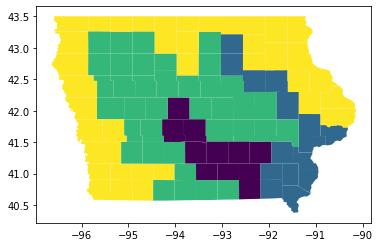

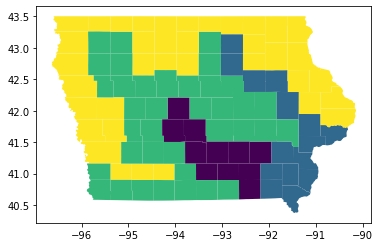

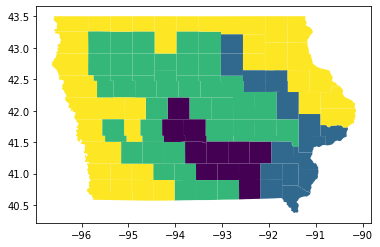

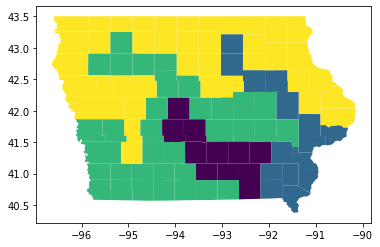

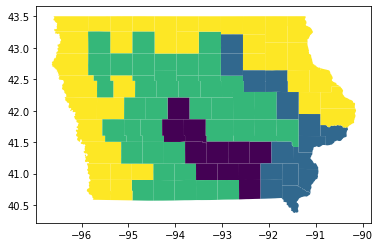

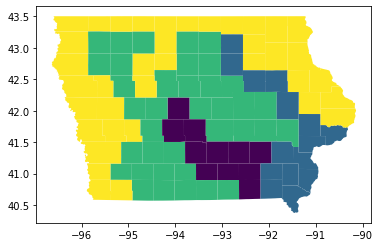

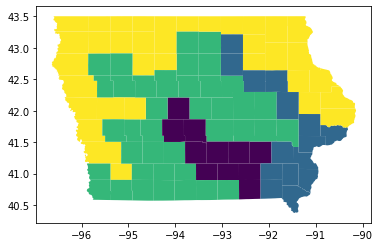

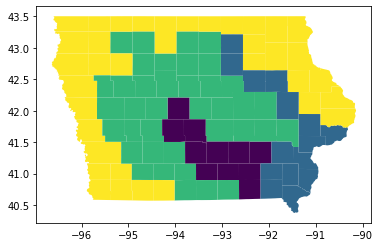

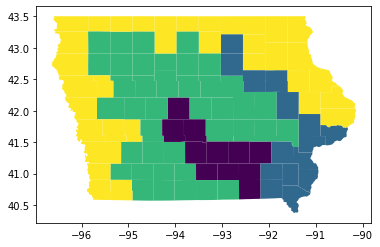

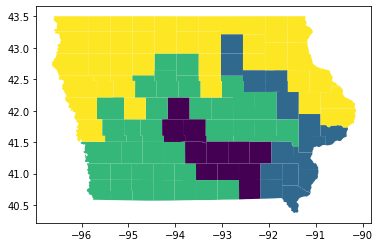

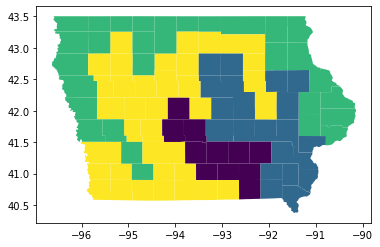

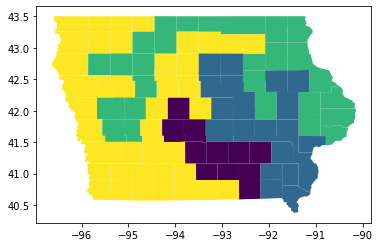

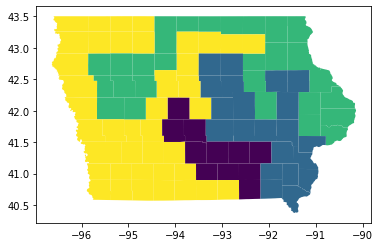

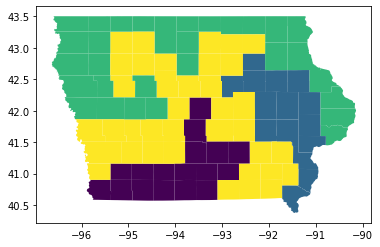

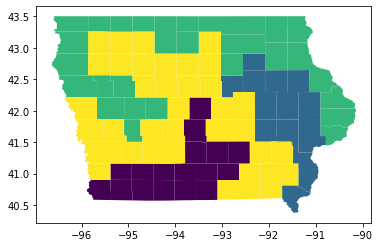

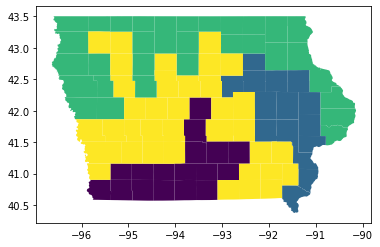

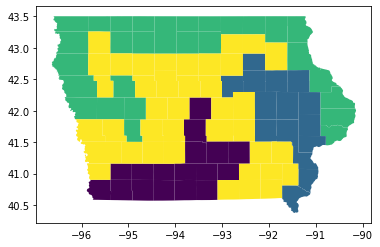

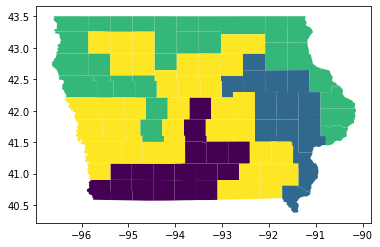

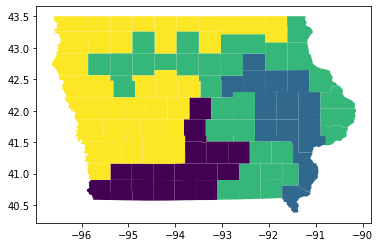

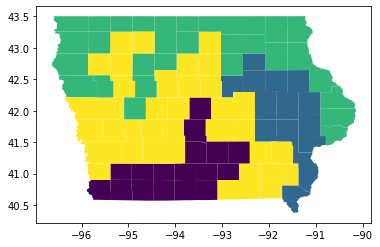

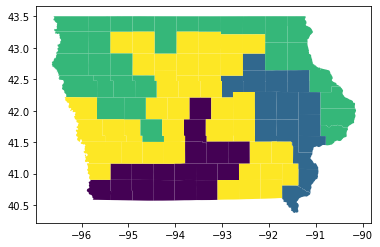

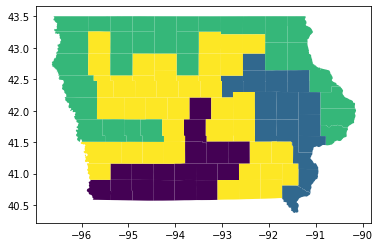

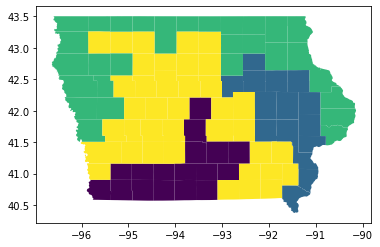

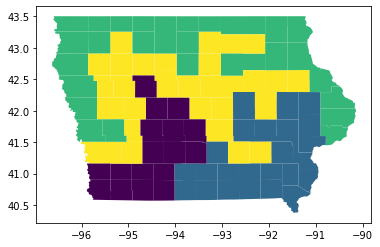

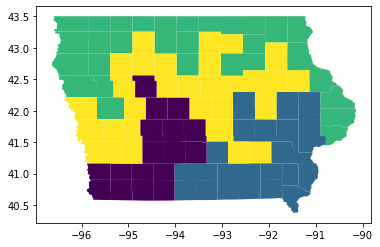

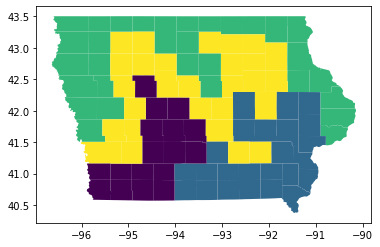

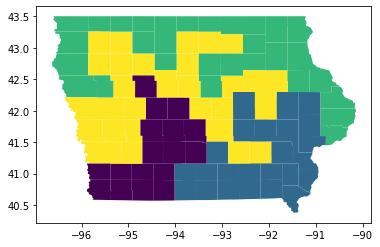

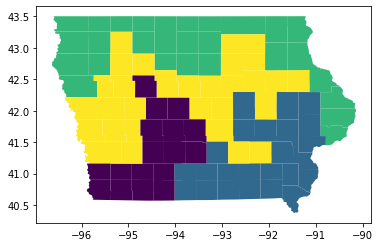

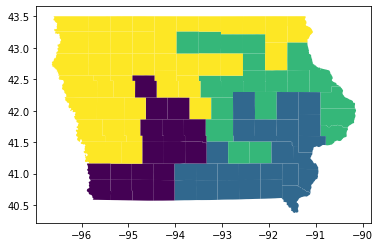

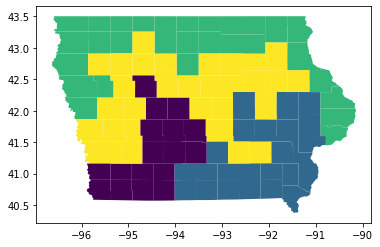

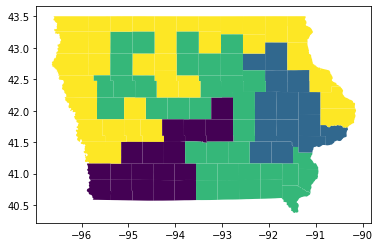

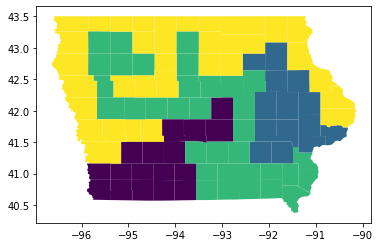

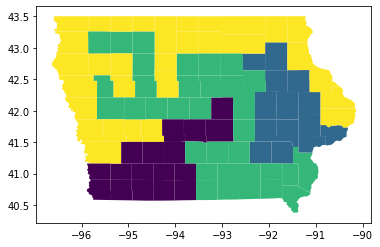

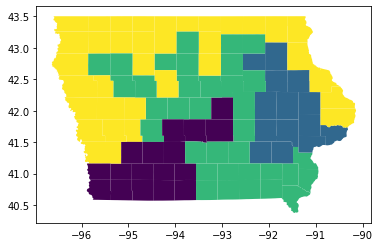

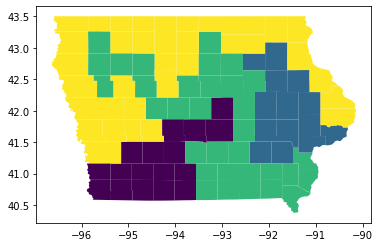

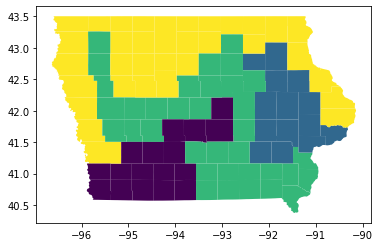

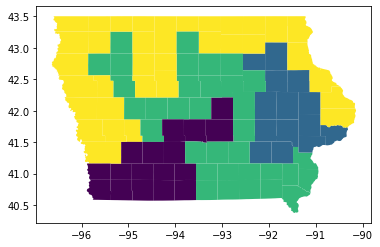

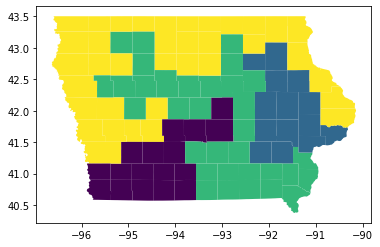

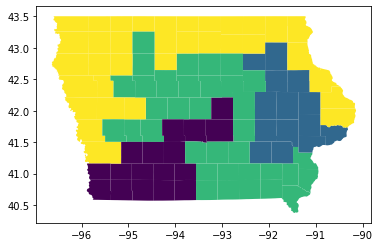

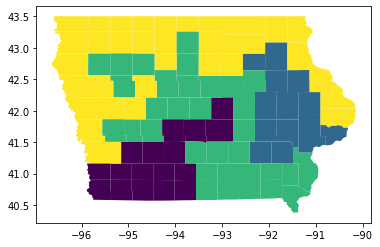

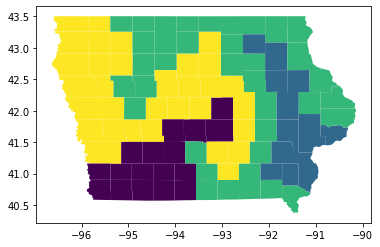

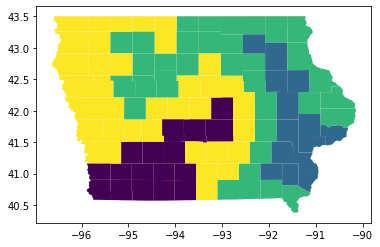

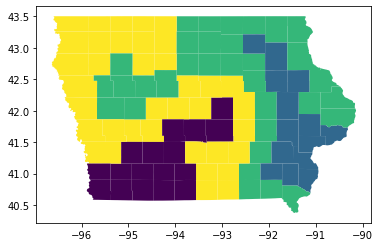

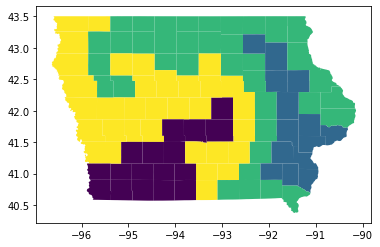

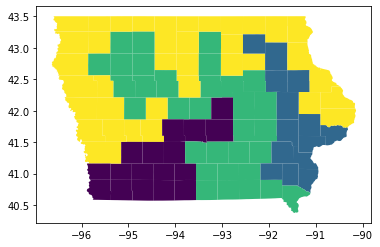

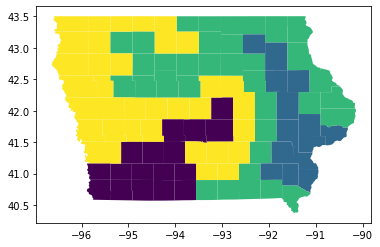

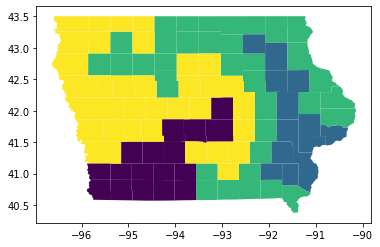

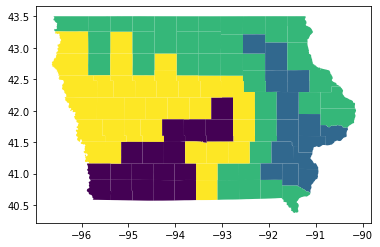

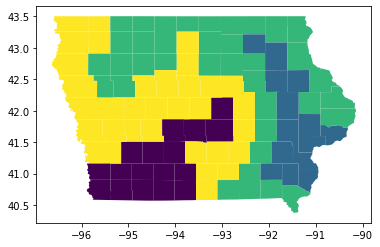

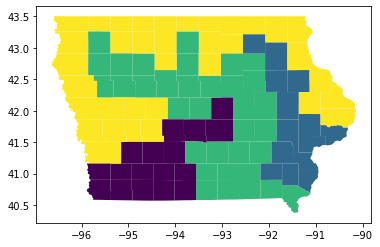

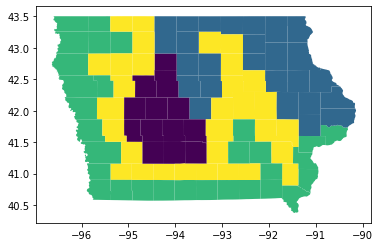

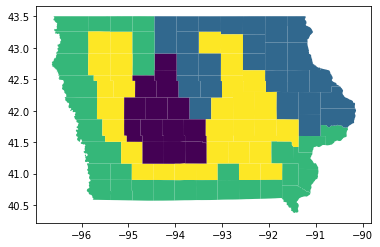

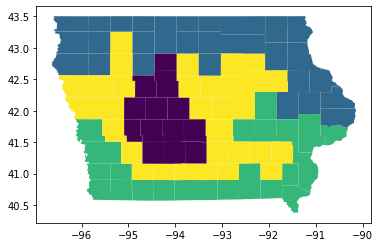

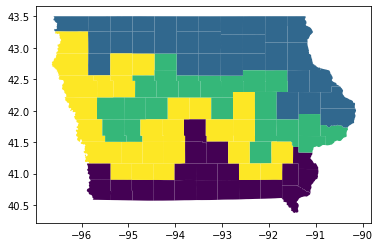

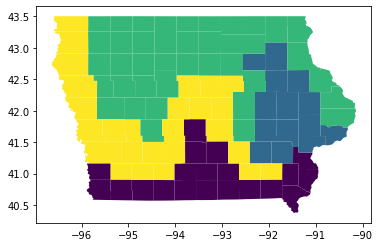

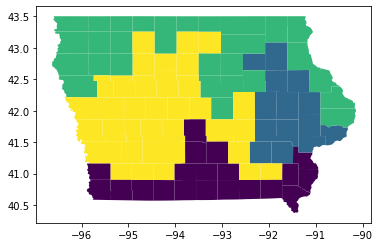

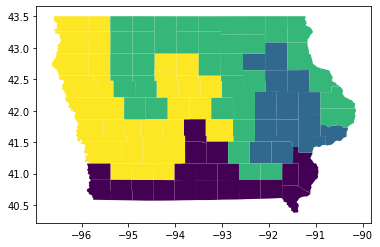

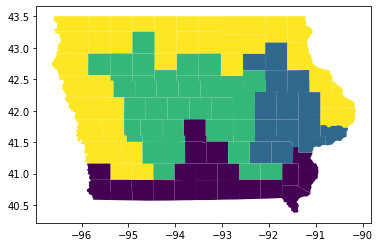

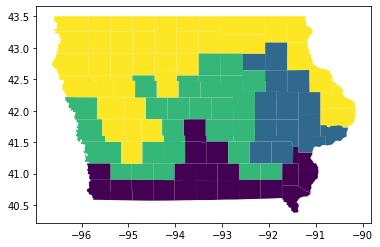

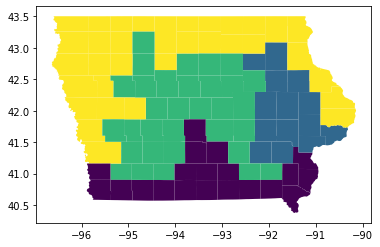

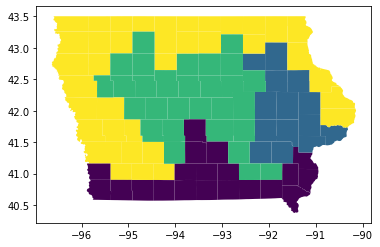

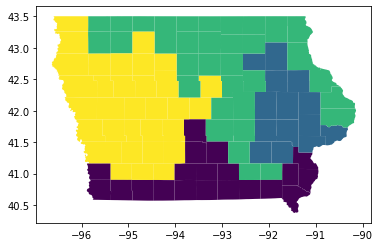

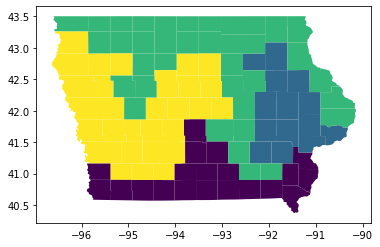

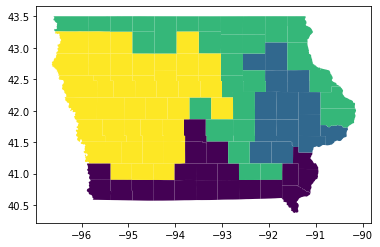

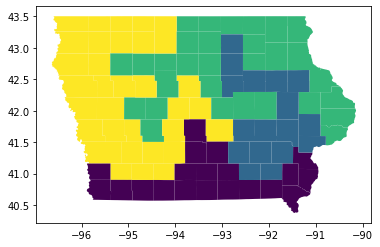

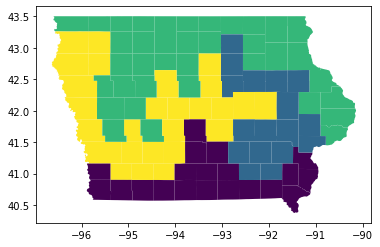

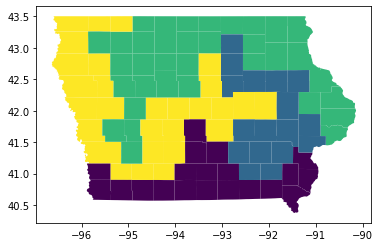

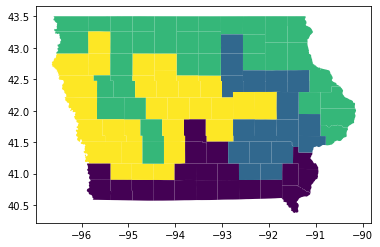

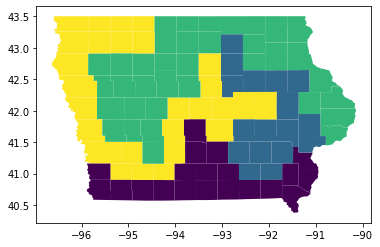

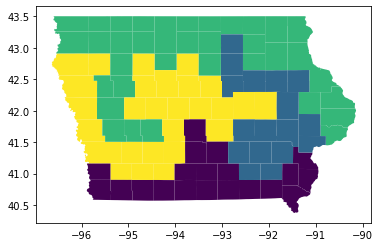

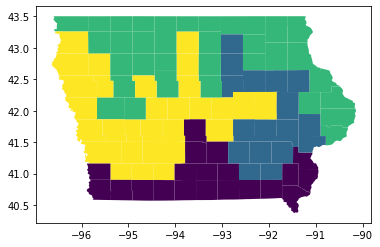

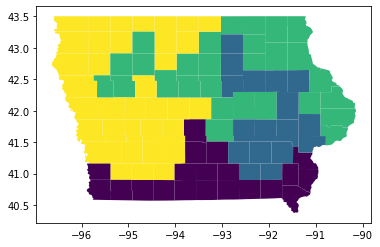

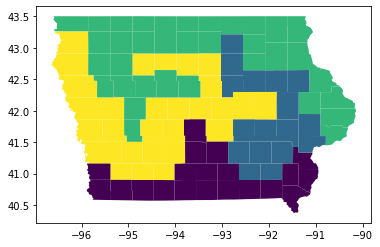

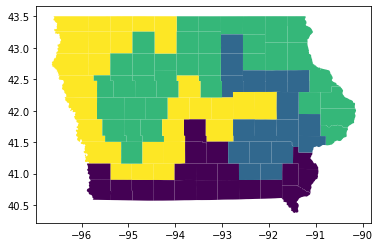

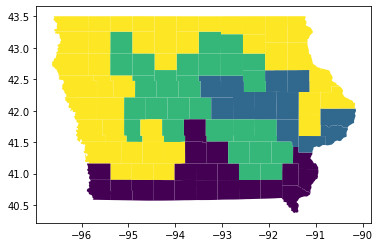

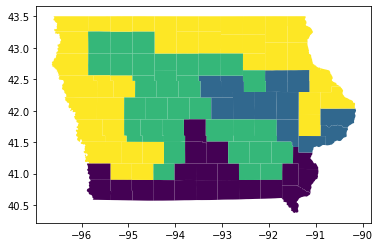

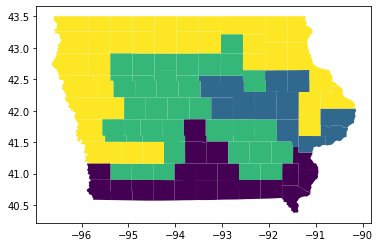

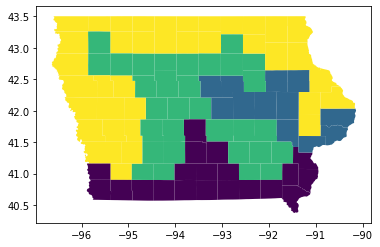

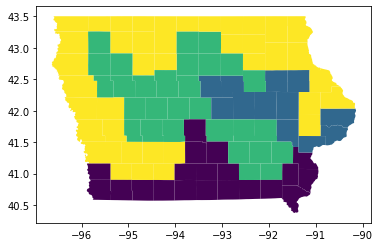

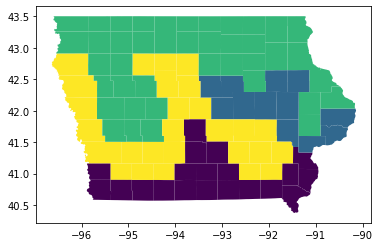

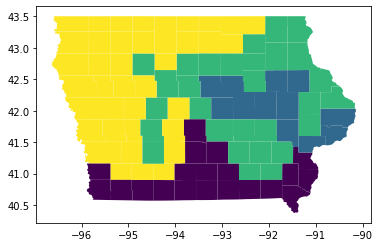

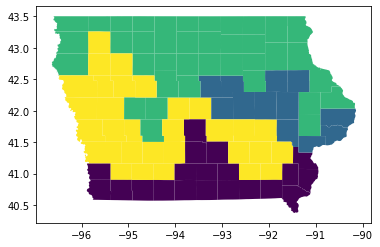

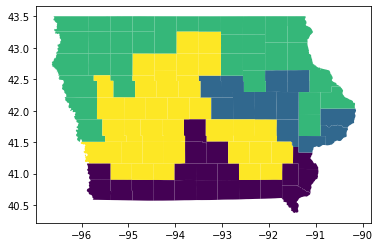

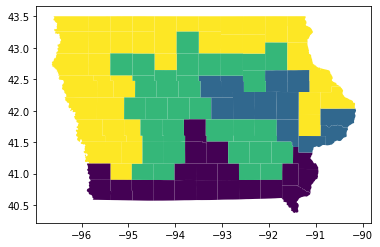

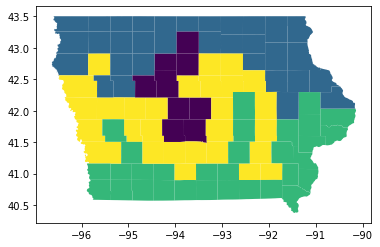

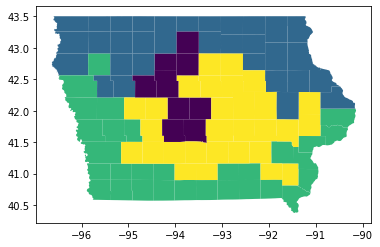

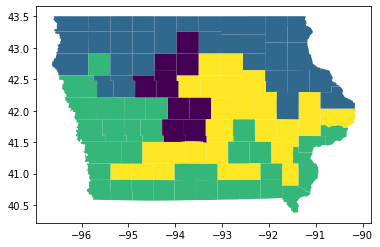

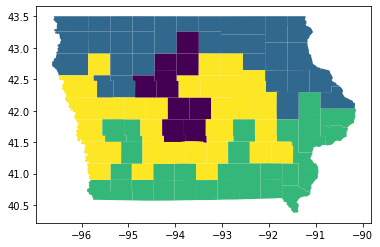

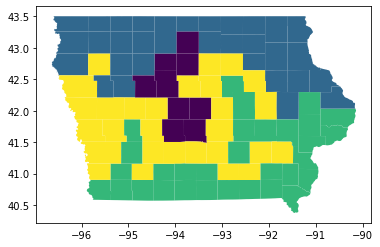

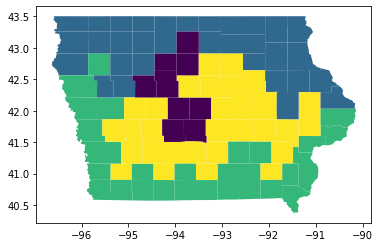

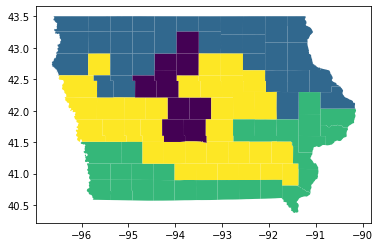

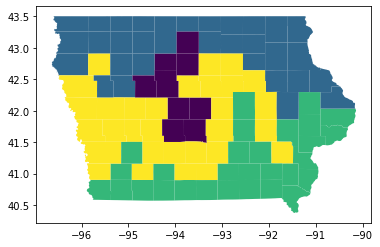

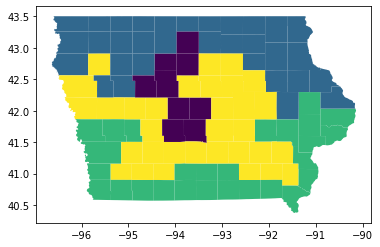

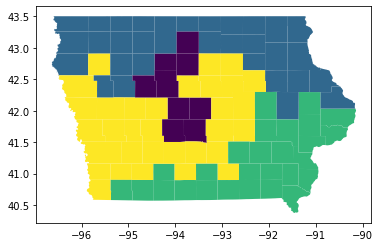

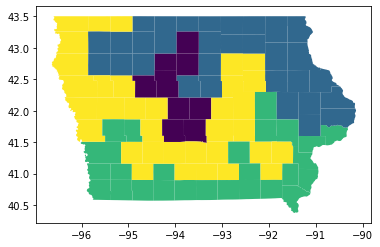

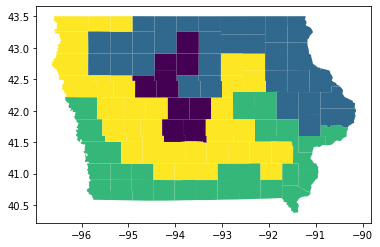

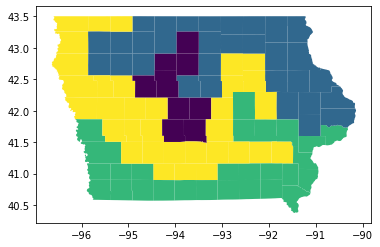

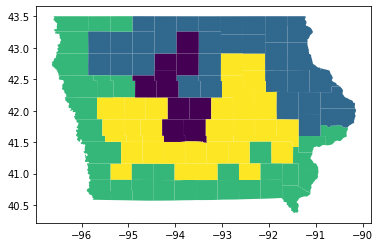

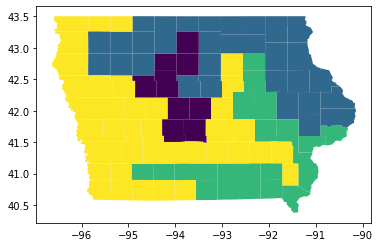

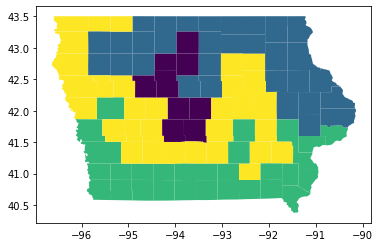

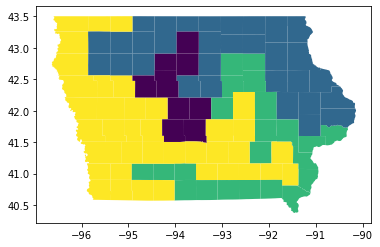

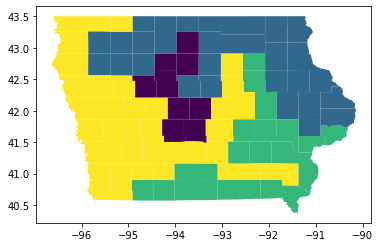

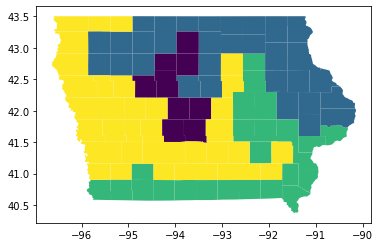

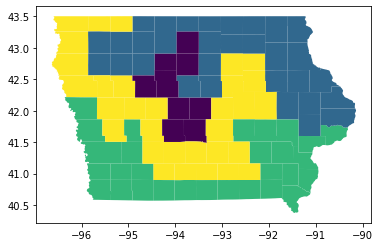

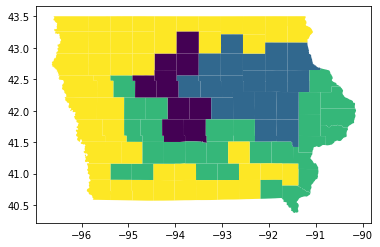

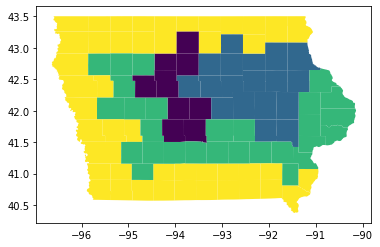

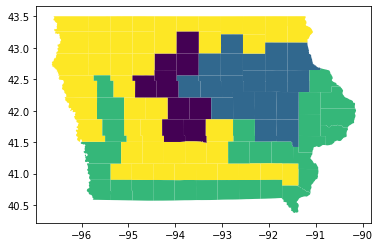

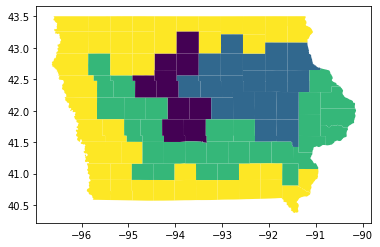

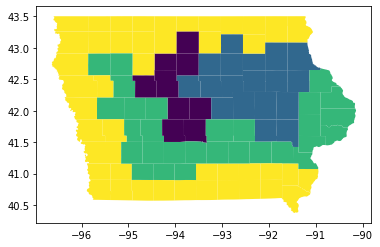

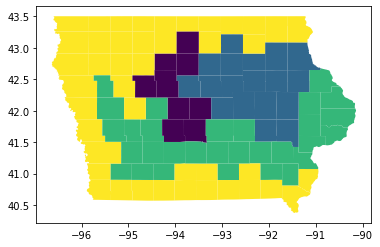

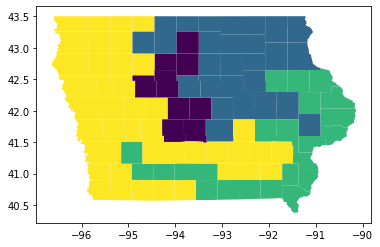

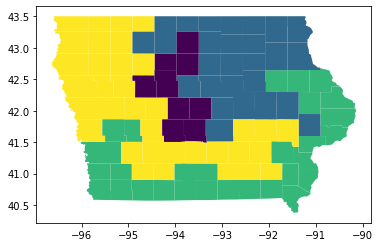

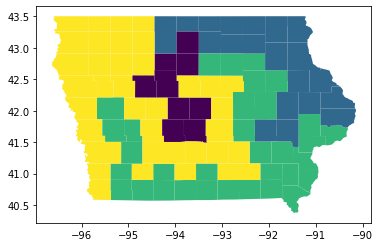

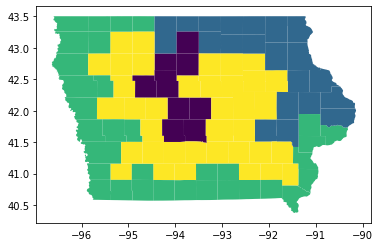

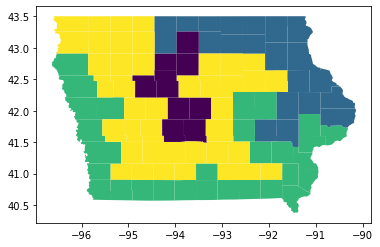

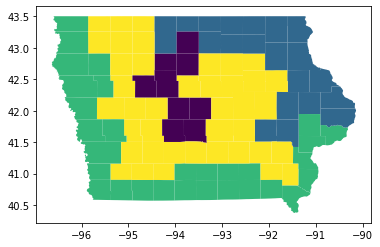

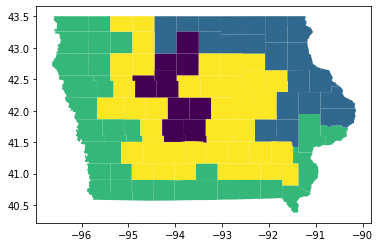

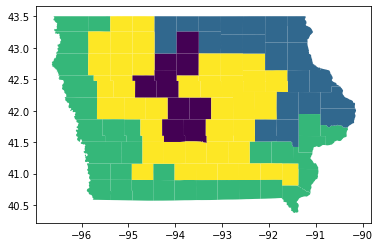

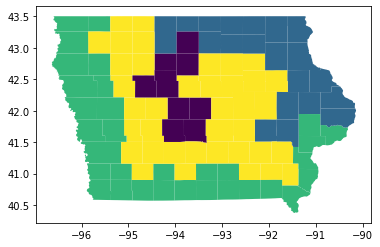

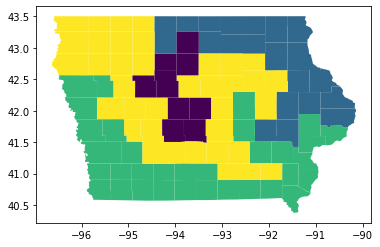

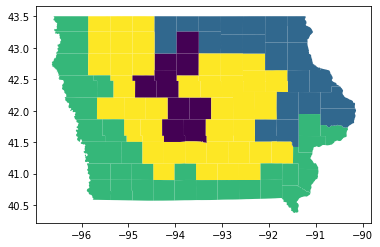

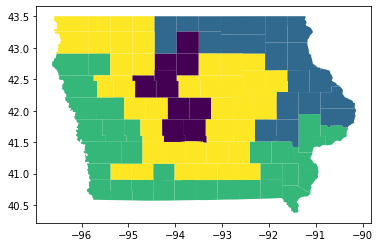

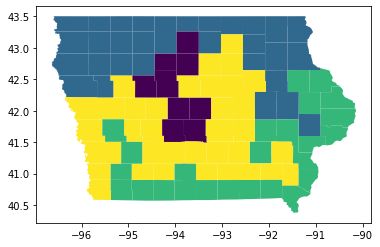

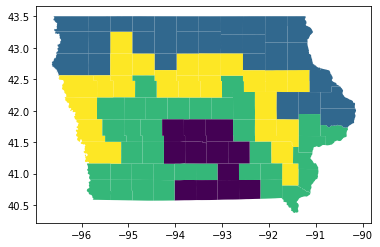

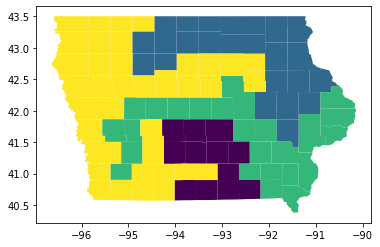

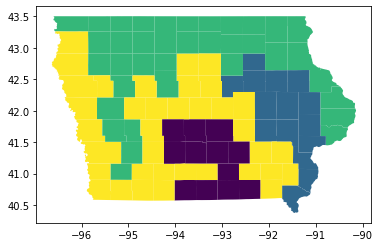

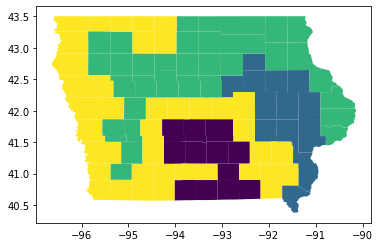

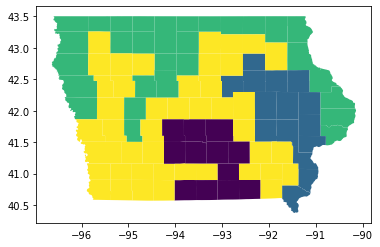

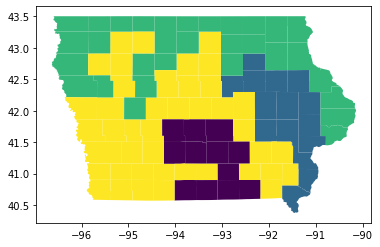

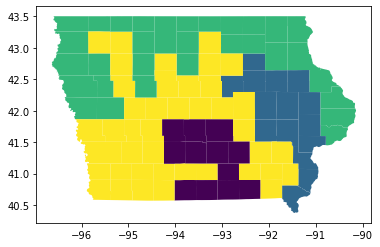

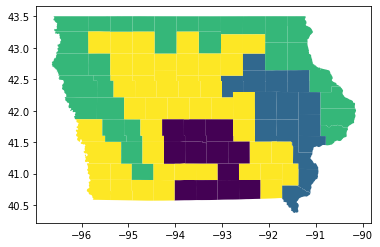

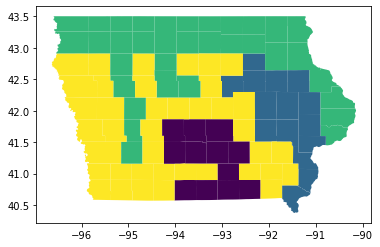

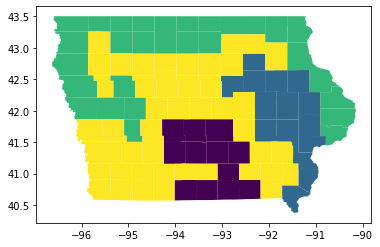

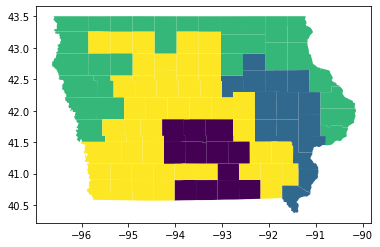

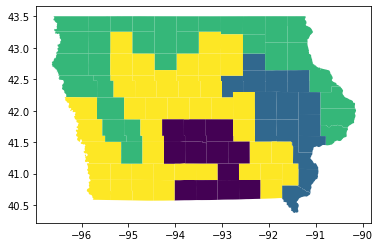

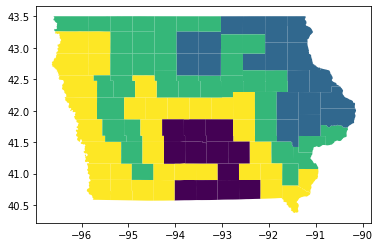

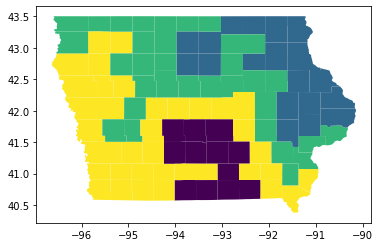

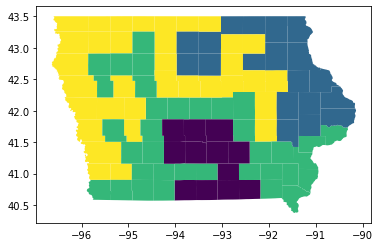

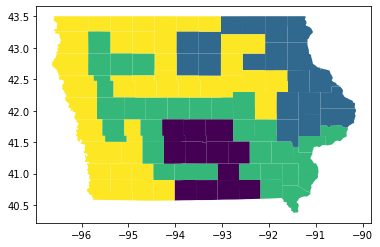

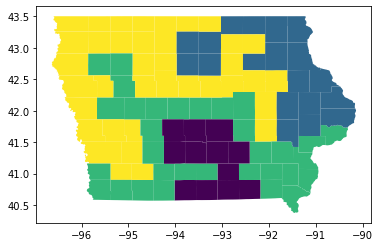

In [7]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) 
    draw_plan( filepath, filename, G, plan )

In [8]:
print("plans =",plans)

plans = [[[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [4, 6, 9, 10, 14, 16, 18, 23, 28, 32, 33, 36, 37, 43, 45, 49, 50, 52, 53, 58, 59, 60, 62, 63, 66, 68, 70, 71, 73, 76, 79, 83, 85, 86, 91, 96, 98], [0, 1, 2, 5, 7, 11, 15, 19, 20, 21, 22, 27, 30, 31, 35, 40, 41, 42, 51, 55, 56, 57, 64, 65, 69, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [4, 6, 9, 10, 14, 16, 18, 21, 22, 23, 27, 28, 32, 36, 37, 45, 49, 50, 52, 53, 58, 59, 60, 62, 66, 68, 71, 73, 76, 79, 83, 85, 86, 91, 92, 96, 98], [0, 1, 2, 5, 7, 11, 15, 19, 20, 30, 31, 33, 35, 40, 41, 42, 43, 51, 55, 56, 57, 63, 64, 65, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 4, 6, 9, 10, 16, 18, 23, 28, 32, 36, 37, 43, 45, 49, 50, 52, 53, 58, 59, 60, 63, 66, 